**1. Dataset Loading**

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import KFold
from tensorflow.keras import layers, models

In [2]:
bapok_df = pd.read_csv('harga_bapokting_surabaya.csv')

In [3]:
bapok_df.shape

(1521, 26)

In [4]:
bapok_df.head()

,Tanggal,Beras Premium,Beras Medium,Beras SPHP,Jagung Tk Peternak,Kedelai Biji Kering (Impor),Bawang Merah,Bawang Putih Bonggol,Cabai Merah Keriting,Cabai Merah Besar,...,Minyak Goreng Curah,Tepung Terigu (Curah),Minyakita,Tepung Terigu Kemasan,Ikan Kembung,Ikan Tongkol,Ikan Bandeng,Garam Konsumsi,Daging Kerbau Beku (Impor),Daging Kerbau Segar (Lokal)
0,1/3/2021,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2/3/2021,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3/3/2021,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4/3/2021,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5/3/2021,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**2. Data Pre-Processing**

In [5]:
#checking for null values
bapok_df.isna().sum()

Tanggal                        0
Beras Premium                  0
Beras Medium                   0
Beras SPHP                     0
Jagung Tk Peternak             0
Kedelai Biji Kering (Impor)    0
Bawang Merah                   0
Bawang Putih Bonggol           0
Cabai Merah Keriting           0
Cabai Merah Besar              0
Daging Sapi Murni              0
Cabai Rawit Merah              0
Daging Ayam Ras                0
Telur Ayam Ras                 0
Gula Konsumsi                  0
Minyak Goreng Kemasan          0
Minyak Goreng Curah            0
Tepung Terigu (Curah)          0
Minyakita                      0
Tepung Terigu Kemasan          0
Ikan Kembung                   0
Ikan Tongkol                   0
Ikan Bandeng                   0
Garam Konsumsi                 0
Daging Kerbau Beku (Impor)     0
Daging Kerbau Segar (Lokal)    0
dtype: int64

In [6]:
(bapok_df == 0).sum()
(bapok_df == 0).mean() * 100  # dalam persen

Tanggal                          0.000000
Beras Premium                   14.595661
Beras Medium                    14.595661
Beras SPHP                      84.418146
Jagung Tk Peternak              78.040763
Kedelai Biji Kering (Impor)     37.278107
Bawang Merah                    14.595661
Bawang Putih Bonggol            14.595661
Cabai Merah Keriting            14.595661
Cabai Merah Besar               92.636423
Daging Sapi Murni               14.595661
Cabai Rawit Merah               14.595661
Daging Ayam Ras                 14.595661
Telur Ayam Ras                  14.595661
Gula Konsumsi                   14.595661
Minyak Goreng Kemasan           14.661407
Minyak Goreng Curah             35.568705
Tepung Terigu (Curah)           14.595661
Minyakita                       92.636423
Tepung Terigu Kemasan           51.873767
Ikan Kembung                    49.638396
Ikan Tongkol                    48.191979
Ikan Bandeng                    46.679816
Garam Konsumsi                  51

In [7]:
zero_counts = (bapok_df == 0).sum()

zero_percent = (bapok_df == 0).mean() * 100
threshold = 15
columns_to_drop = zero_percent[zero_percent > threshold].index
bapok_df = bapok_df.drop(columns=columns_to_drop)

remaining_columns = bapok_df.columns

zero_counts_cleaned = (bapok_df == 0).sum()
zero_percent_cleaned = (bapok_df == 0).mean() * 100

remaining_columns, zero_counts_cleaned, zero_percent_cleaned

(Index(['Tanggal', 'Beras Premium', 'Beras Medium', 'Bawang Merah',
        'Bawang Putih Bonggol', 'Cabai Merah Keriting', 'Daging Sapi Murni',
        'Cabai Rawit Merah', 'Daging Ayam Ras', 'Telur Ayam Ras',
        'Gula Konsumsi', 'Minyak Goreng Kemasan', 'Tepung Terigu (Curah)'],
       dtype='object'),
 Tanggal                    0
 Beras Premium            222
 Beras Medium             222
 Bawang Merah             222
 Bawang Putih Bonggol     222
 Cabai Merah Keriting     222
 Daging Sapi Murni        222
 Cabai Rawit Merah        222
 Daging Ayam Ras          222
 Telur Ayam Ras           222
 Gula Konsumsi            222
 Minyak Goreng Kemasan    223
 Tepung Terigu (Curah)    222
 dtype: int64,
 Tanggal                   0.000000
 Beras Premium            14.595661
 Beras Medium             14.595661
 Bawang Merah             14.595661
 Bawang Putih Bonggol     14.595661
 Cabai Merah Keriting     14.595661
 Daging Sapi Murni        14.595661
 Cabai Rawit Merah        14.595

In [8]:
bapok_df = bapok_df.drop(columns=["Tepung Terigu (Curah)"])

In [9]:
bapok_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1521 entries, 0 to 1520
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Tanggal                1521 non-null   object
 1   Beras Premium          1521 non-null   int64 
 2   Beras Medium           1521 non-null   int64 
 3   Bawang Merah           1521 non-null   int64 
 4   Bawang Putih Bonggol   1521 non-null   int64 
 5   Cabai Merah Keriting   1521 non-null   int64 
 6   Daging Sapi Murni      1521 non-null   int64 
 7   Cabai Rawit Merah      1521 non-null   int64 
 8   Daging Ayam Ras        1521 non-null   int64 
 9   Telur Ayam Ras         1521 non-null   int64 
 10  Gula Konsumsi          1521 non-null   int64 
 11  Minyak Goreng Kemasan  1521 non-null   int64 
dtypes: int64(11), object(1)
memory usage: 142.7+ KB


In [10]:
#converting the dataype of 'Date' col to 'datetime'
bapok_df['Tanggal'] = pd.to_datetime(bapok_df['Tanggal'], dayfirst=True)

In [11]:
#making the 'Date' col as index
bapok_df.set_index('Tanggal', inplace = True)

In [12]:
# Fungsi untuk mengganti nol dengan rata-rata per bulan (fallback ke bulan berikut jika perlu)
def fill_zero_with_monthly_mean(df):
    df_filled = df.copy()
    
    for col in df.columns:
        for idx, value in df[col].items():
            if value == 0:
                bulan_ini = idx.to_period('M')
                nilai_bulan_ini = df_filled[col][df_filled.index.to_period('M') == bulan_ini]
                mean_bulan_ini = nilai_bulan_ini[nilai_bulan_ini != 0].mean()
                
                if pd.isna(mean_bulan_ini):  # jika bulan itu semua 0, cari bulan setelahnya
                    bulan_berikutnya = bulan_ini + 1
                    while True:
                        nilai_bulan_berikut = df_filled[col][df_filled.index.to_period('M') == bulan_berikutnya]
                        mean_bulan_berikut = nilai_bulan_berikut[nilai_bulan_berikut != 0].mean()
                        if not pd.isna(mean_bulan_berikut):
                            mean_bulan_ini = mean_bulan_berikut
                            break
                        bulan_berikutnya += 1
                
                # Bulatkan rata-rata menjadi bilangan bulat
                df_filled.at[idx, col] = int(mean_bulan_ini)  # Menggunakan int() untuk menghilangkan koma

    return df_filled

# Terapkan fungsi ini
bapok_df = fill_zero_with_monthly_mean(bapok_df)

# Cek apakah masih ada nilai 0
(bapok_df == 0).sum()


Beras Premium            0
Beras Medium             0
Bawang Merah             0
Bawang Putih Bonggol     0
Cabai Merah Keriting     0
Daging Sapi Murni        0
Cabai Rawit Merah        0
Daging Ayam Ras          0
Telur Ayam Ras           0
Gula Konsumsi            0
Minyak Goreng Kemasan    0
dtype: int64

In [13]:
bapok_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1521 entries, 2021-03-01 to 2025-04-29
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Beras Premium          1521 non-null   int64
 1   Beras Medium           1521 non-null   int64
 2   Bawang Merah           1521 non-null   int64
 3   Bawang Putih Bonggol   1521 non-null   int64
 4   Cabai Merah Keriting   1521 non-null   int64
 5   Daging Sapi Murni      1521 non-null   int64
 6   Cabai Rawit Merah      1521 non-null   int64
 7   Daging Ayam Ras        1521 non-null   int64
 8   Telur Ayam Ras         1521 non-null   int64
 9   Gula Konsumsi          1521 non-null   int64
 10  Minyak Goreng Kemasan  1521 non-null   int64
dtypes: int64(11)
memory usage: 174.9 KB


In [14]:
#sort the indexes
bapok_df.sort_index(inplace = True)

In [15]:
bapok_df.head()

,Beras Premium,Beras Medium,Bawang Merah,Bawang Putih Bonggol,Cabai Merah Keriting,Daging Sapi Murni,Cabai Rawit Merah,Daging Ayam Ras,Telur Ayam Ras,Gula Konsumsi,Minyak Goreng Kemasan
Tanggal,,,,,,,,,,,
2021-03-01,12515,10500,33789,26684,52210,105000,100526,30315,22105,12000,13578
2021-03-02,12515,10500,33789,26684,52210,105000,100526,30315,22105,12000,13578
2021-03-03,12515,10500,33789,26684,52210,105000,100526,30315,22105,12000,13578
2021-03-04,12515,10500,33789,26684,52210,105000,100526,30315,22105,12000,13578
2021-03-05,12515,10500,33789,26684,52210,105000,100526,30315,22105,12000,13578


In [ ]:
# Eksponential moving average
ema_span = 5 
bapok_ema_df = bapok_df.ewm(span=ema_span, adjust=False).mean()

# normalizing the smoothed data
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(bapok_ema_df)

In [17]:
scaled_values

array([[0.17809845, 0.26033812, 0.34216628, ..., 0.33015895, 0.05540267,
        0.03190367],
       [0.17809845, 0.26033812, 0.34216628, ..., 0.33015895, 0.05540267,
        0.03190367],
       [0.17809845, 0.26033812, 0.34216628, ..., 0.33015895, 0.05540267,
        0.03190367],
       ...,
       [0.67945742, 0.86840811, 0.47379772, ..., 0.54186361, 0.95996973,
        0.69619462],
       [0.67961579, 0.86840811, 0.45415052, ..., 0.54742268, 0.9700874 ,
        0.69683259],
       [0.65778805, 0.86840811, 0.39478751, ..., 0.53245008, 0.94220584,
        0.66372472]])

In [18]:
#converting the array into dataframe
bapok_scaled_df = pd.DataFrame(scaled_values, columns = bapok_df.columns, index = bapok_df.index)

In [19]:
bapok_scaled_df.head()

,Beras Premium,Beras Medium,Bawang Merah,Bawang Putih Bonggol,Cabai Merah Keriting,Daging Sapi Murni,Cabai Rawit Merah,Daging Ayam Ras,Telur Ayam Ras,Gula Konsumsi,Minyak Goreng Kemasan
Tanggal,,,,,,,,,,,
2021-03-01,0.178098,0.260338,0.342166,0.251927,0.392414,0.191184,0.88138,0.235735,0.330159,0.055403,0.031904
2021-03-02,0.178098,0.260338,0.342166,0.251927,0.392414,0.191184,0.88138,0.235735,0.330159,0.055403,0.031904
2021-03-03,0.178098,0.260338,0.342166,0.251927,0.392414,0.191184,0.88138,0.235735,0.330159,0.055403,0.031904
2021-03-04,0.178098,0.260338,0.342166,0.251927,0.392414,0.191184,0.88138,0.235735,0.330159,0.055403,0.031904
2021-03-05,0.178098,0.260338,0.342166,0.251927,0.392414,0.191184,0.88138,0.235735,0.330159,0.055403,0.031904


**3. Plotting the Columns**

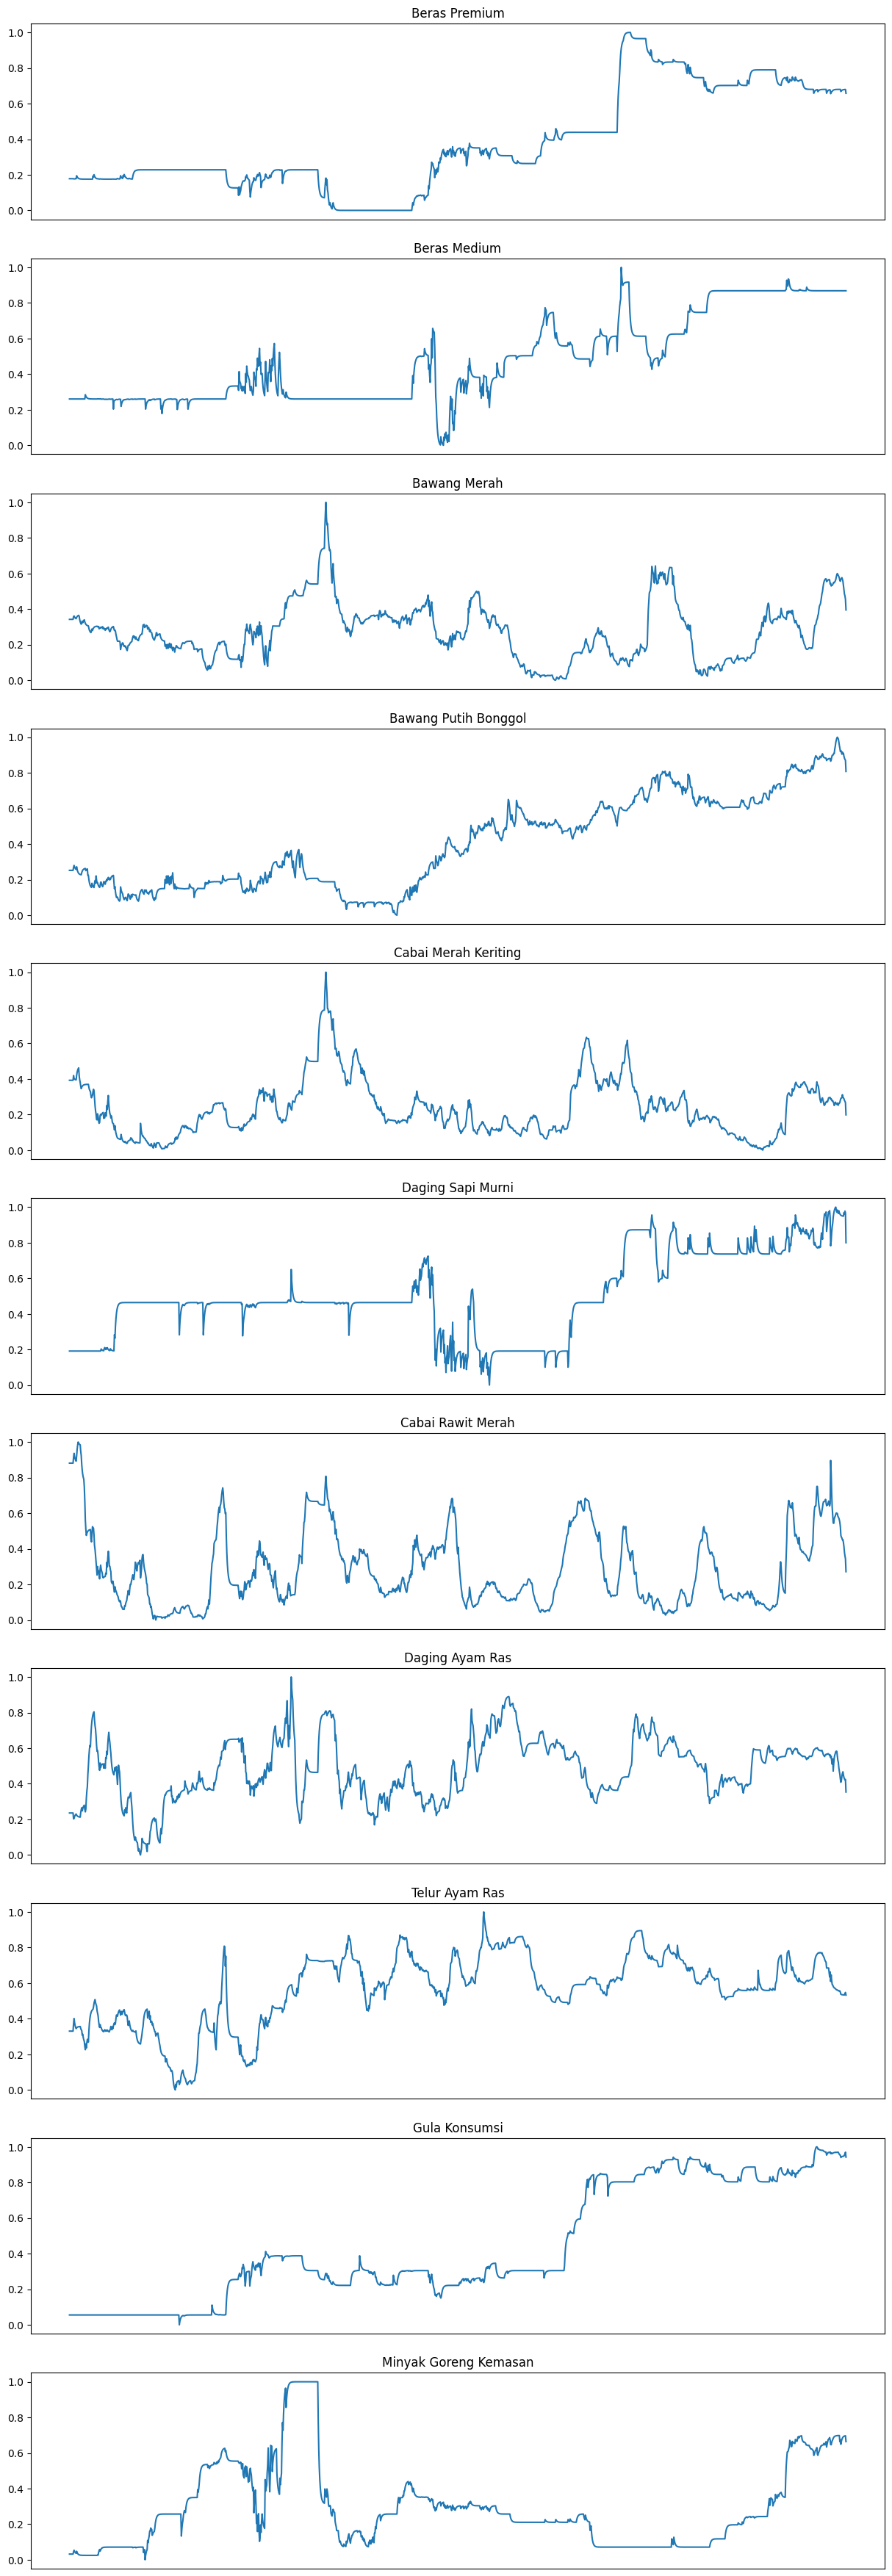

In [20]:
plt.rcParams['figure.figsize'] = (15, 45)
figure, axes = plt.subplots(11)

for ax, col in zip(axes, bapok_scaled_df.columns):
  ax.plot(bapok_scaled_df[col])
  ax.set_title(col)
  ax.axes.xaxis.set_visible(False)

**4. Create the Sliding Window Sequences**

**5.  Building the LSTM model**


Fold 1/5


c:\Program Files\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step
MAE:  5500.1288
RMSE: 11903.7212
MAPE: 12.99%
R²:   -2.2355

Fold 2/5


c:\Program Files\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step
MAE:  2656.5758
RMSE: 4961.9073
MAPE: 8.44%
R²:   -0.4069

Fold 3/5


c:\Program Files\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step
MAE:  3717.5361
RMSE: 5488.4354
MAPE: 12.80%
R²:   -8.0581

Fold 4/5


c:\Program Files\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step
MAE:  4763.6506
RMSE: 7213.6906
MAPE: 14.60%
R²:   -61.0682

Fold 5/5


c:\Program Files\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step
MAE:  3651.7580
RMSE: 6759.1826
MAPE: 12.51%
R²:   -36.8485

=== Summary ===
Average MAE :  4057.9298
Average RMSE:  7265.3874
Average MAPE:  12.27%
Average R²  :  -21.7235


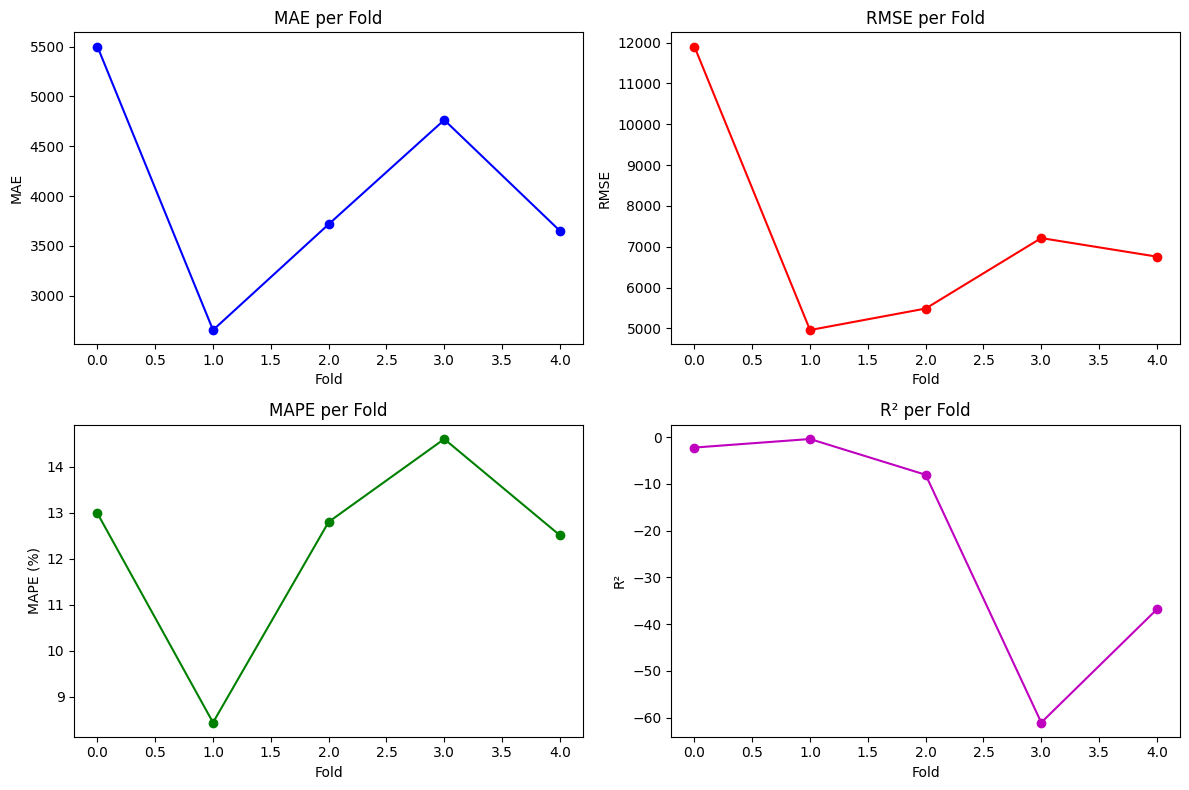

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

np.random.seed(42)
tf.random.set_seed(42)

# === STEP 2: Buat Sequence Data untuk LSTM ===
def create_sequence(data, window_size):
    X = []
    y = []
    for i in range(window_size, len(data)):
        X.append(data[i - window_size:i])
        y.append(data[i])
    return np.array(X), np.array(y)

window_size = 30
X, y = create_sequence(bapok_scaled_df.values, window_size)

# === STEP 3: Time Series Cross-Validation ===
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

# Menyimpan metrik evaluasi untuk setiap fold
mae_scores = []
rmse_scores = []
mape_scores = []
r2_scores = []

for fold, (train_idx, test_idx) in enumerate(tscv.split(X)):
    print(f"\nFold {fold+1}/{n_splits}")
    
    # Membagi data untuk training dan testing berdasarkan split
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model = models.Sequential([
        layers.LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
        layers.Dropout(0.3),
        layers.LSTM(50, return_sequences=True),
        layers.Dropout(0.3),
        layers.LSTM(50),
        layers.Dropout(0.3),
        layers.Dense(y_train.shape[1])
    ])

    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    # Callbacks untuk early stopping dan reduce learning rate
    callbacks = [
        EarlyStopping(patience=25, restore_best_weights=True),
        ReduceLROnPlateau(patience=3, factor=0.5)
    ]

    # Training model
    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=32,
        validation_split=0.1,
        callbacks=callbacks,
        verbose=0
    )

    # Prediksi hasil dari model
    y_pred = model.predict(X_test)

    # Inverse scaling untuk mendapatkan nilai asli
    y_test_inv = scaler.inverse_transform(y_test)
    y_pred_inv = scaler.inverse_transform(y_pred)

    # Evaluasi MAE, RMSE, MAPE, dan R²
    fold_mae = mean_absolute_error(y_test_inv, y_pred_inv)
    fold_rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
    fold_mape = np.mean(np.abs((y_test_inv - y_pred_inv) / np.clip(y_test_inv, 1e-8, None))) * 100
    fold_r2 = r2_score(y_test_inv, y_pred_inv)

    mae_scores.append(fold_mae)
    rmse_scores.append(fold_rmse)
    mape_scores.append(fold_mape)
    r2_scores.append(fold_r2)

    print(f"MAE:  {fold_mae:.4f}")
    print(f"RMSE: {fold_rmse:.4f}")
    print(f"MAPE: {fold_mape:.2f}%")
    print(f"R²:   {fold_r2:.4f}")

# === Summary Report ===
print("\n=== Summary ===")
print(f"Average MAE :  {np.mean(mae_scores):.4f}")
print(f"Average RMSE:  {np.mean(rmse_scores):.4f}")
print(f"Average MAPE:  {np.mean(mape_scores):.2f}%")
print(f"Average R²  :  {np.mean(r2_scores):.4f}")

# === Optional: Plot Performance per Fold ===

plt.figure(figsize=(12, 8))

# Plot MAE
plt.subplot(2, 2, 1)
plt.plot(mae_scores, marker='o', linestyle='-', color='b')
plt.title('MAE per Fold')
plt.xlabel('Fold')
plt.ylabel('MAE')

# Plot RMSE
plt.subplot(2, 2, 2)
plt.plot(rmse_scores, marker='o', linestyle='-', color='r')
plt.title('RMSE per Fold')
plt.xlabel('Fold')
plt.ylabel('RMSE')

# Plot MAPE
plt.subplot(2, 2, 3)
plt.plot(mape_scores, marker='o', linestyle='-', color='g')
plt.title('MAPE per Fold')
plt.xlabel('Fold')
plt.ylabel('MAPE (%)')

# Plot R²
plt.subplot(2, 2, 4)
plt.plot(r2_scores, marker='o', linestyle='-', color='m')
plt.title('R² per Fold')
plt.xlabel('Fold')
plt.ylabel('R²')

plt.tight_layout()
plt.show()

In [22]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 30, 50)         │        12,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 30, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 30, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 30, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 11)             │           561 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,085 (625.34 KB)

 Trainable params: 53,361 (208.44 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 106,724 (416.89 KB)

In [23]:
history_df = pd.DataFrame(history.history)
history_df.to_csv('training_history.csv', index=False)

In [24]:
# Making predictions on the test data
predictions = model.predict(X_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [25]:
# Inverse scaling to get the original values
predictions = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test)

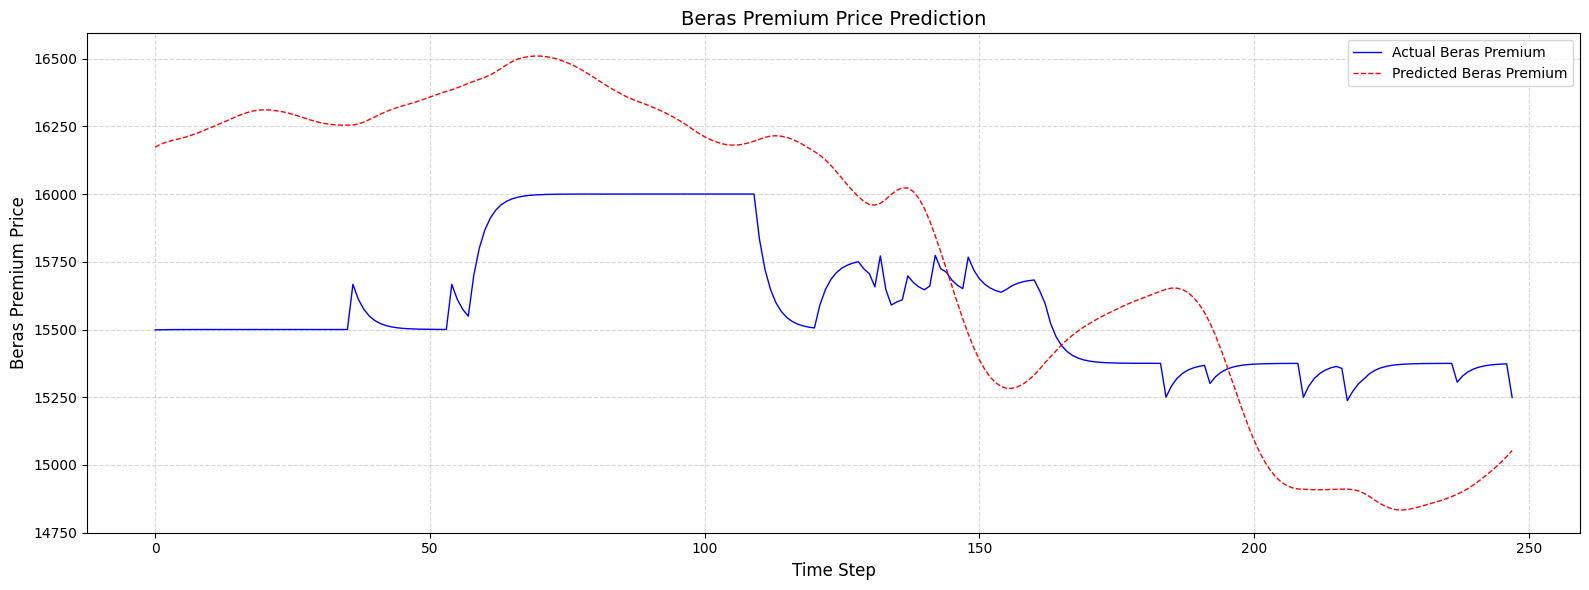

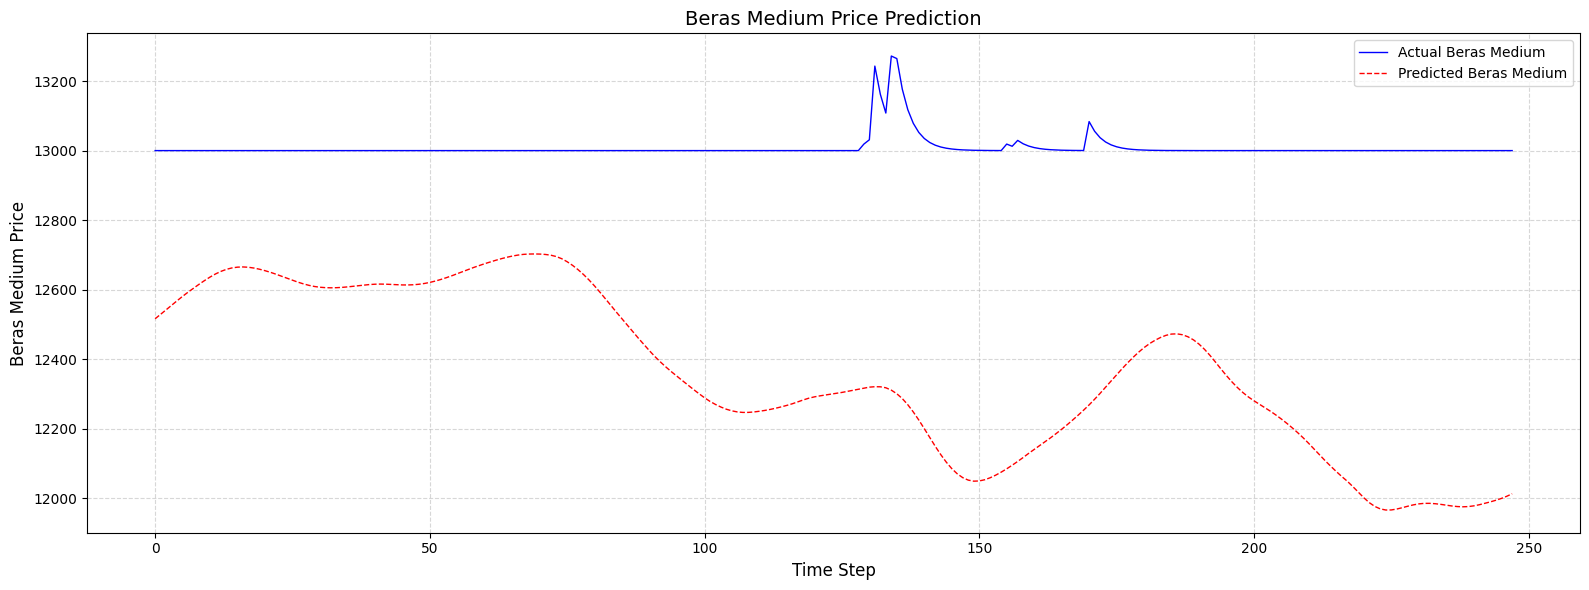

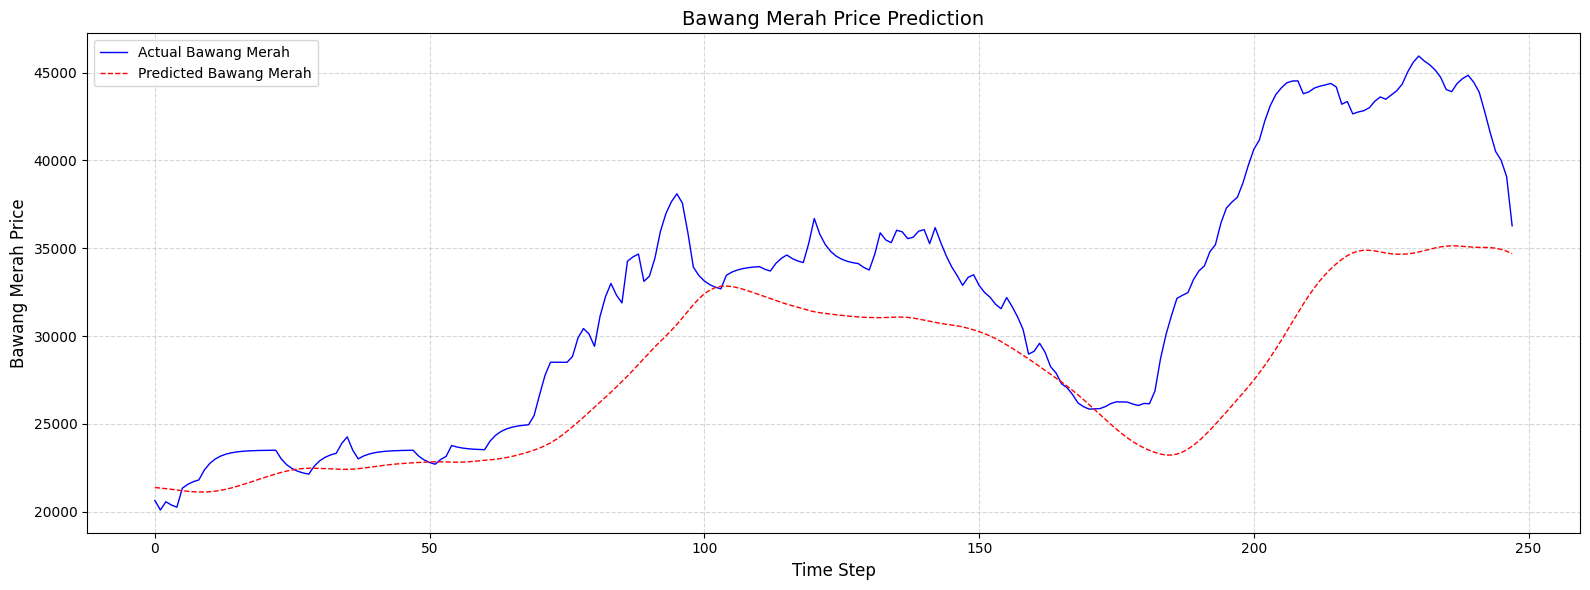

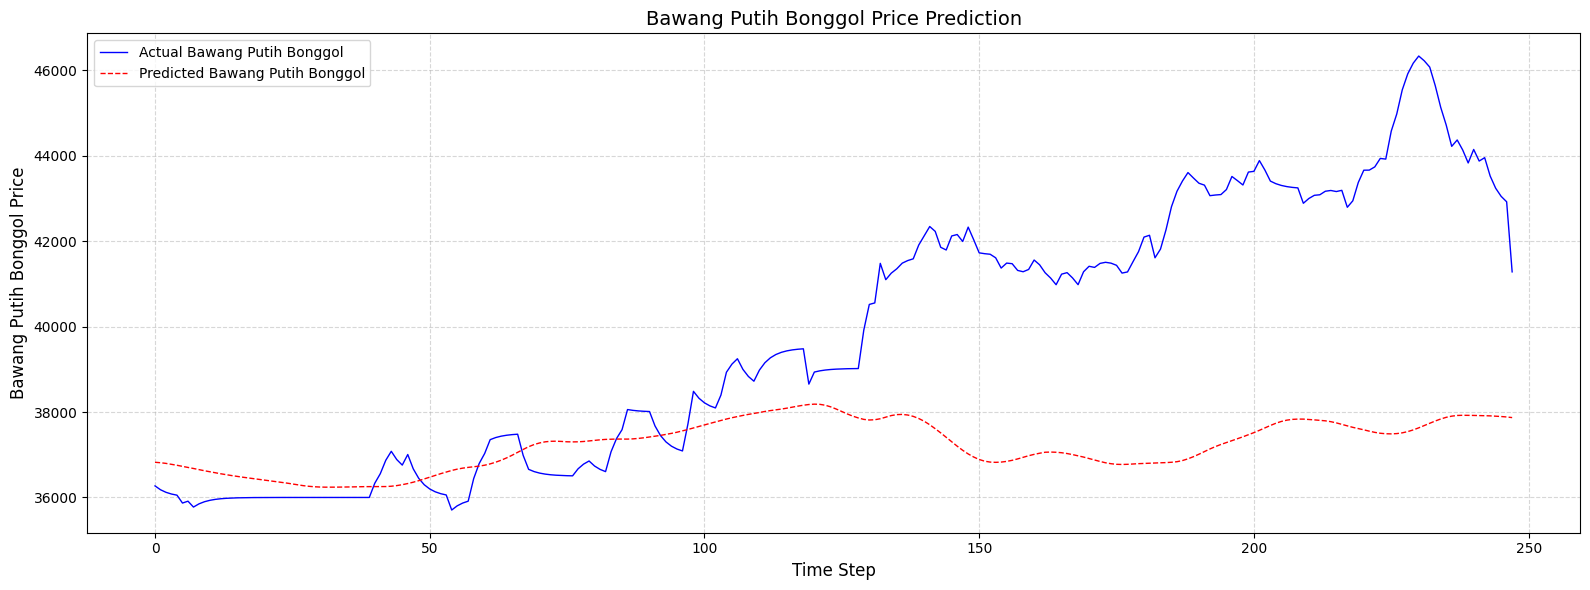

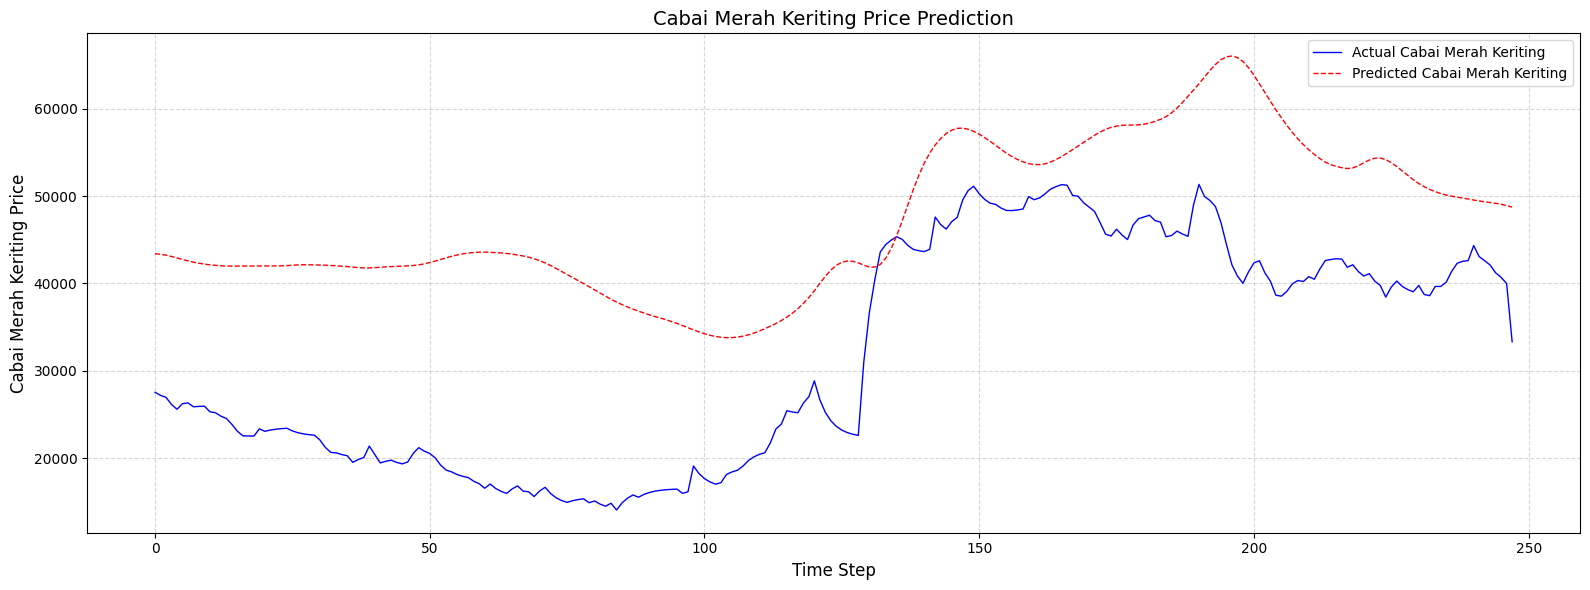

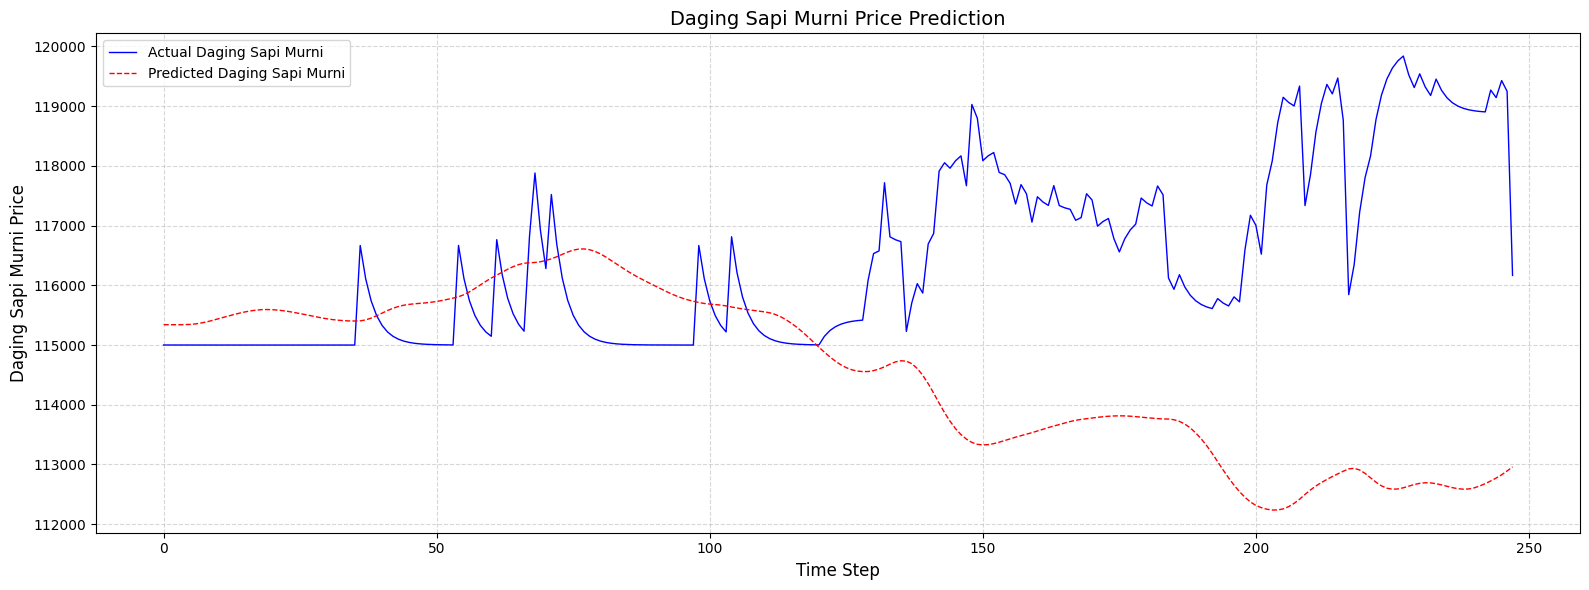

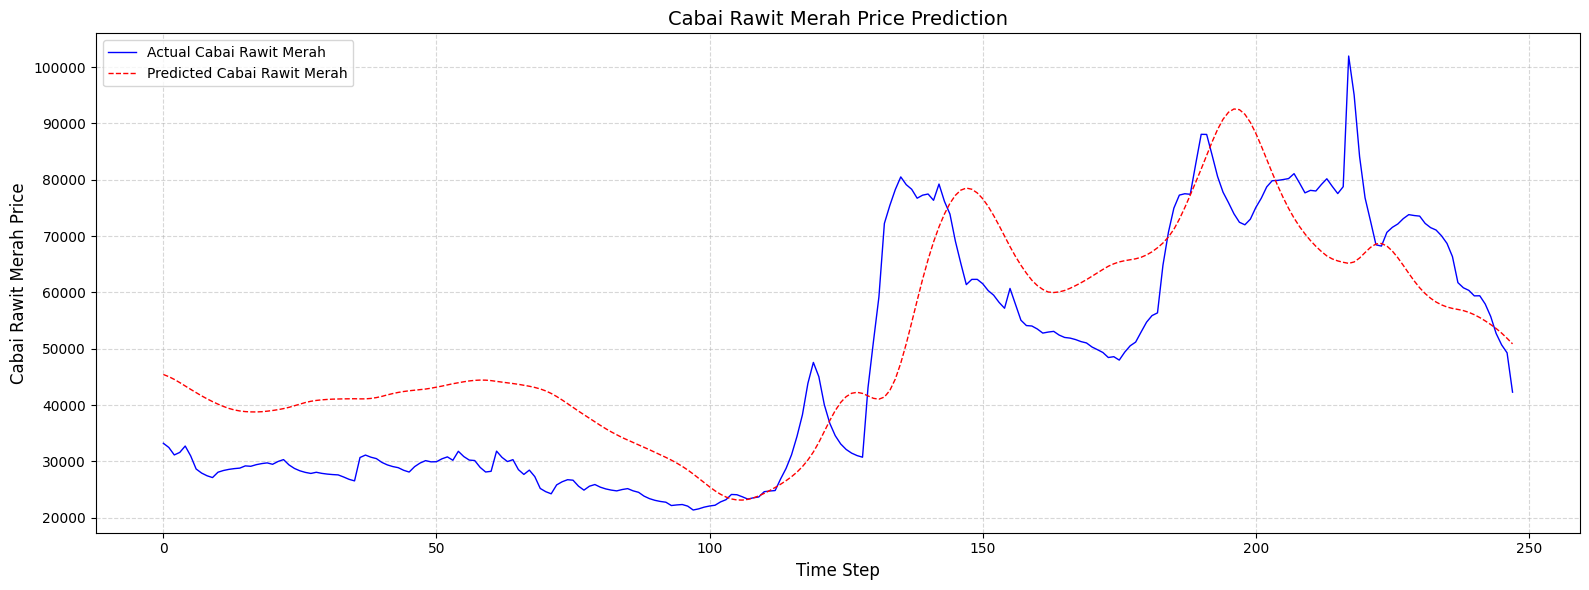

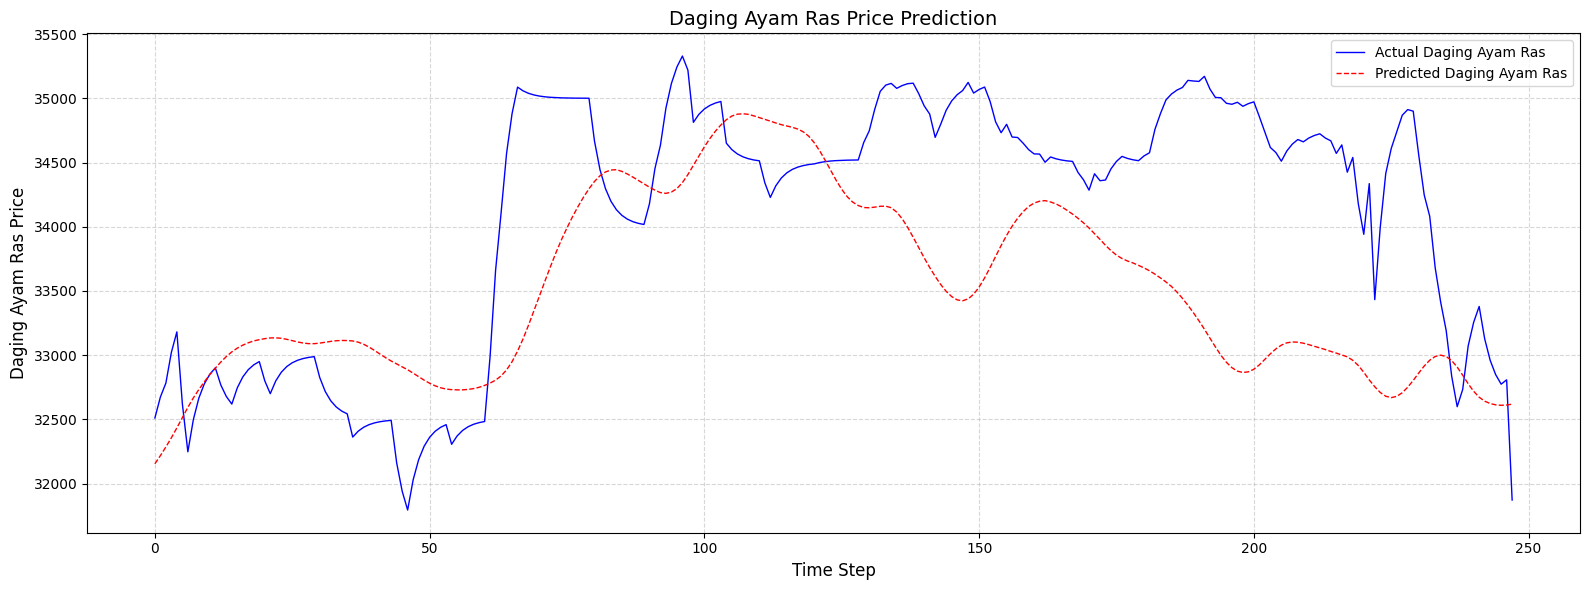

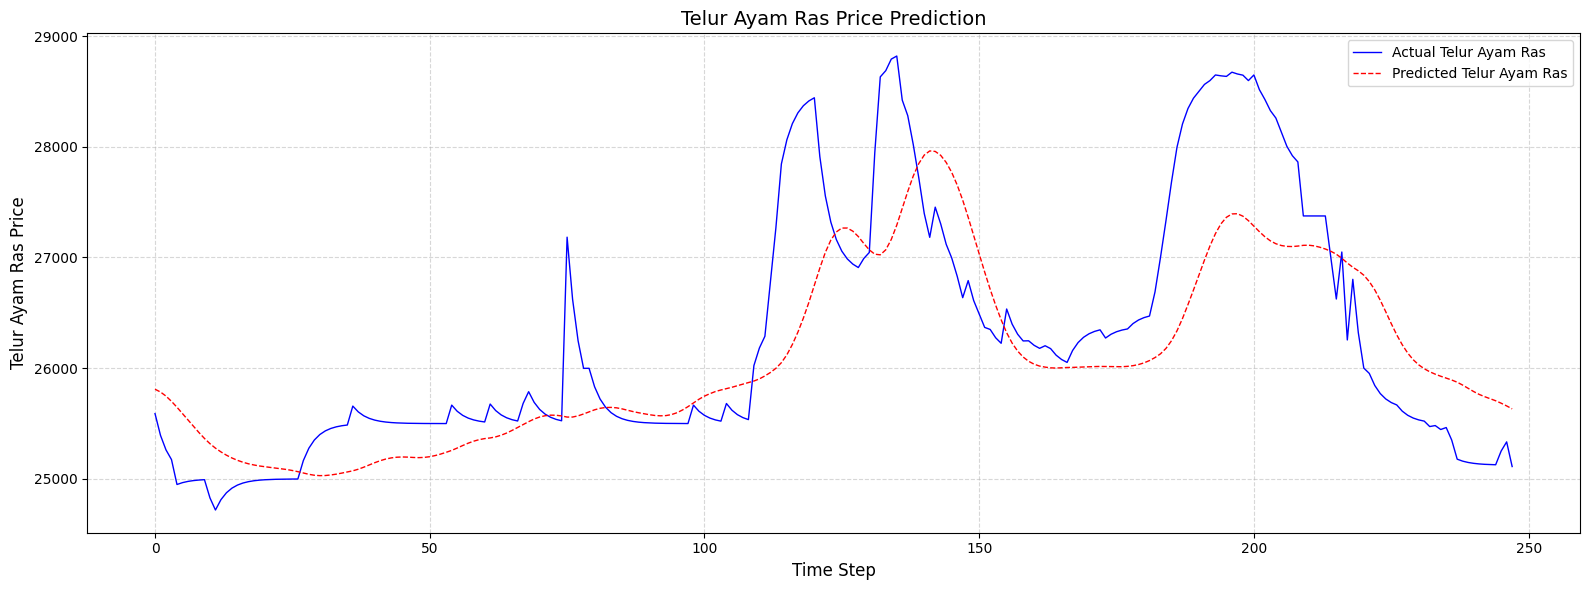

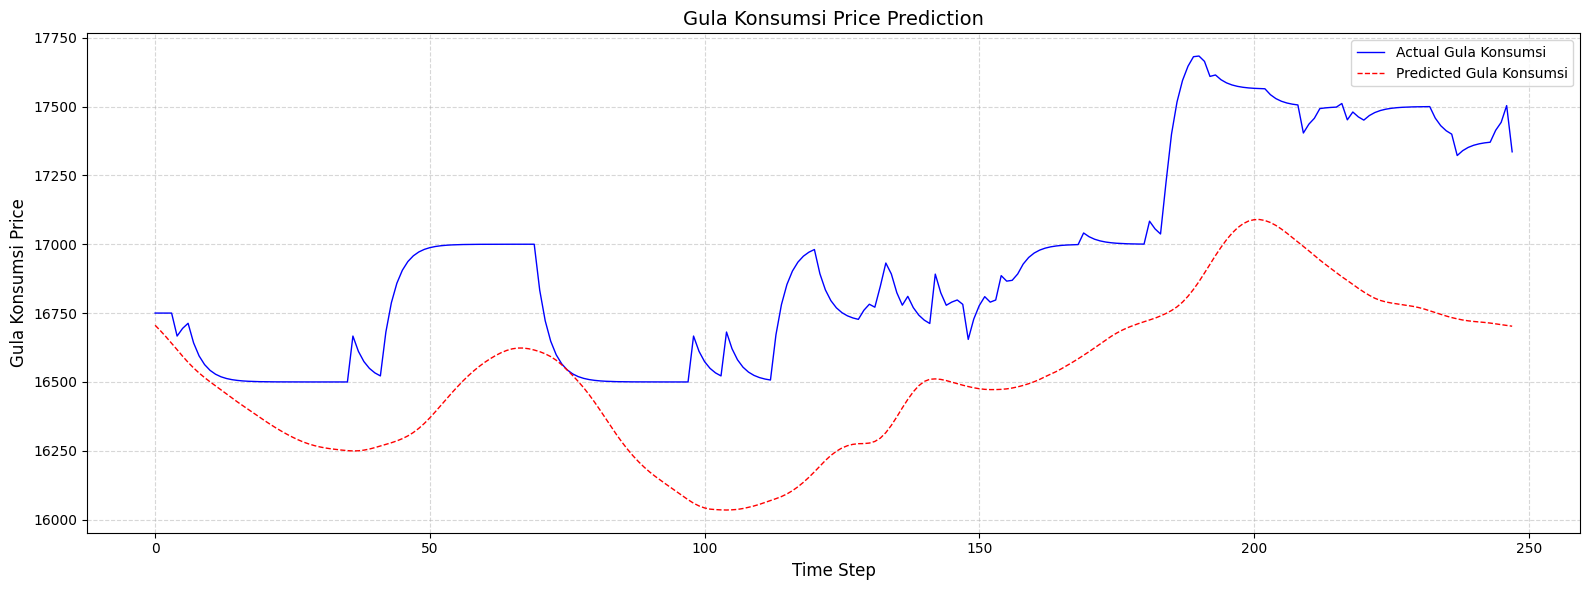

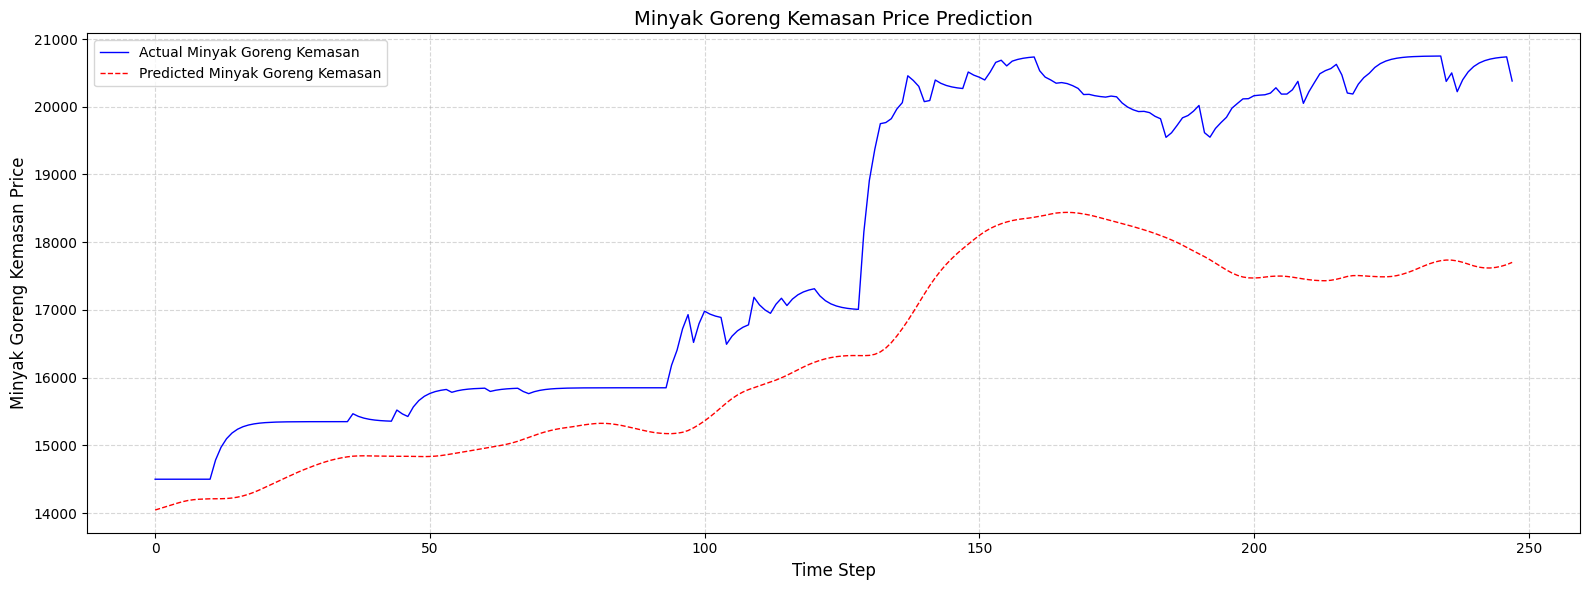

In [26]:
import matplotlib.pyplot as plt

for i, col in enumerate(bapok_scaled_df.columns):
    plt.figure(figsize=(16, 6))  # Perbesar ukuran grafik
    plt.plot(y_test_rescaled[:, i], color='blue', label=f'Actual {col}', linewidth=1)
    plt.plot(predictions[:, i], color='red', label=f'Predicted {col}', linestyle='--', linewidth=1)
    
    plt.title(f'{col} Price Prediction', fontsize=14)
    plt.xlabel('Time Step', fontsize=12)
    plt.ylabel(f'{col} Price', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)  # Tambahkan grid agar lebih terbaca
    plt.legend()
    plt.tight_layout()
    plt.show()


In [27]:
# Menyimpan model
model.save('lstm_bapokting.keras')

In [28]:
from tensorflow.keras.models import load_model
import numpy as np
# Memuat model yang sudah disimpan
model = load_model('lstm_bapokting.keras')

Test Model dengan Data Baru


Contoh 5 data setelah preprocessing untuk Genteng:
     Tanggal  Beras Premium  Beras Medium  Bawang Merah  Bawang Putih Bonggol  \
0 2025-03-01          14500         12500         30000                 40000   
1 2025-03-02          14500         12500         30000                 40000   
2 2025-03-03          14500         12500         34000                 40000   
3 2025-03-04          14500         12500         34000                 40000   
4 2025-03-05          14500         12500         35000                 40000   

   Cabai Merah Keriting  Daging Sapi Murni  Cabai Rawit Merah  \
0                 55000             110000              80000   
1                 55000             110000              80000   
2                 65000             110000             120000   
3                 65000             110000             120000   
4                 50000             110000              70000   

   Daging Ayam Ras  Telur Ayam Ras  Gula Konsumsi  Minyak Goreng Kemas

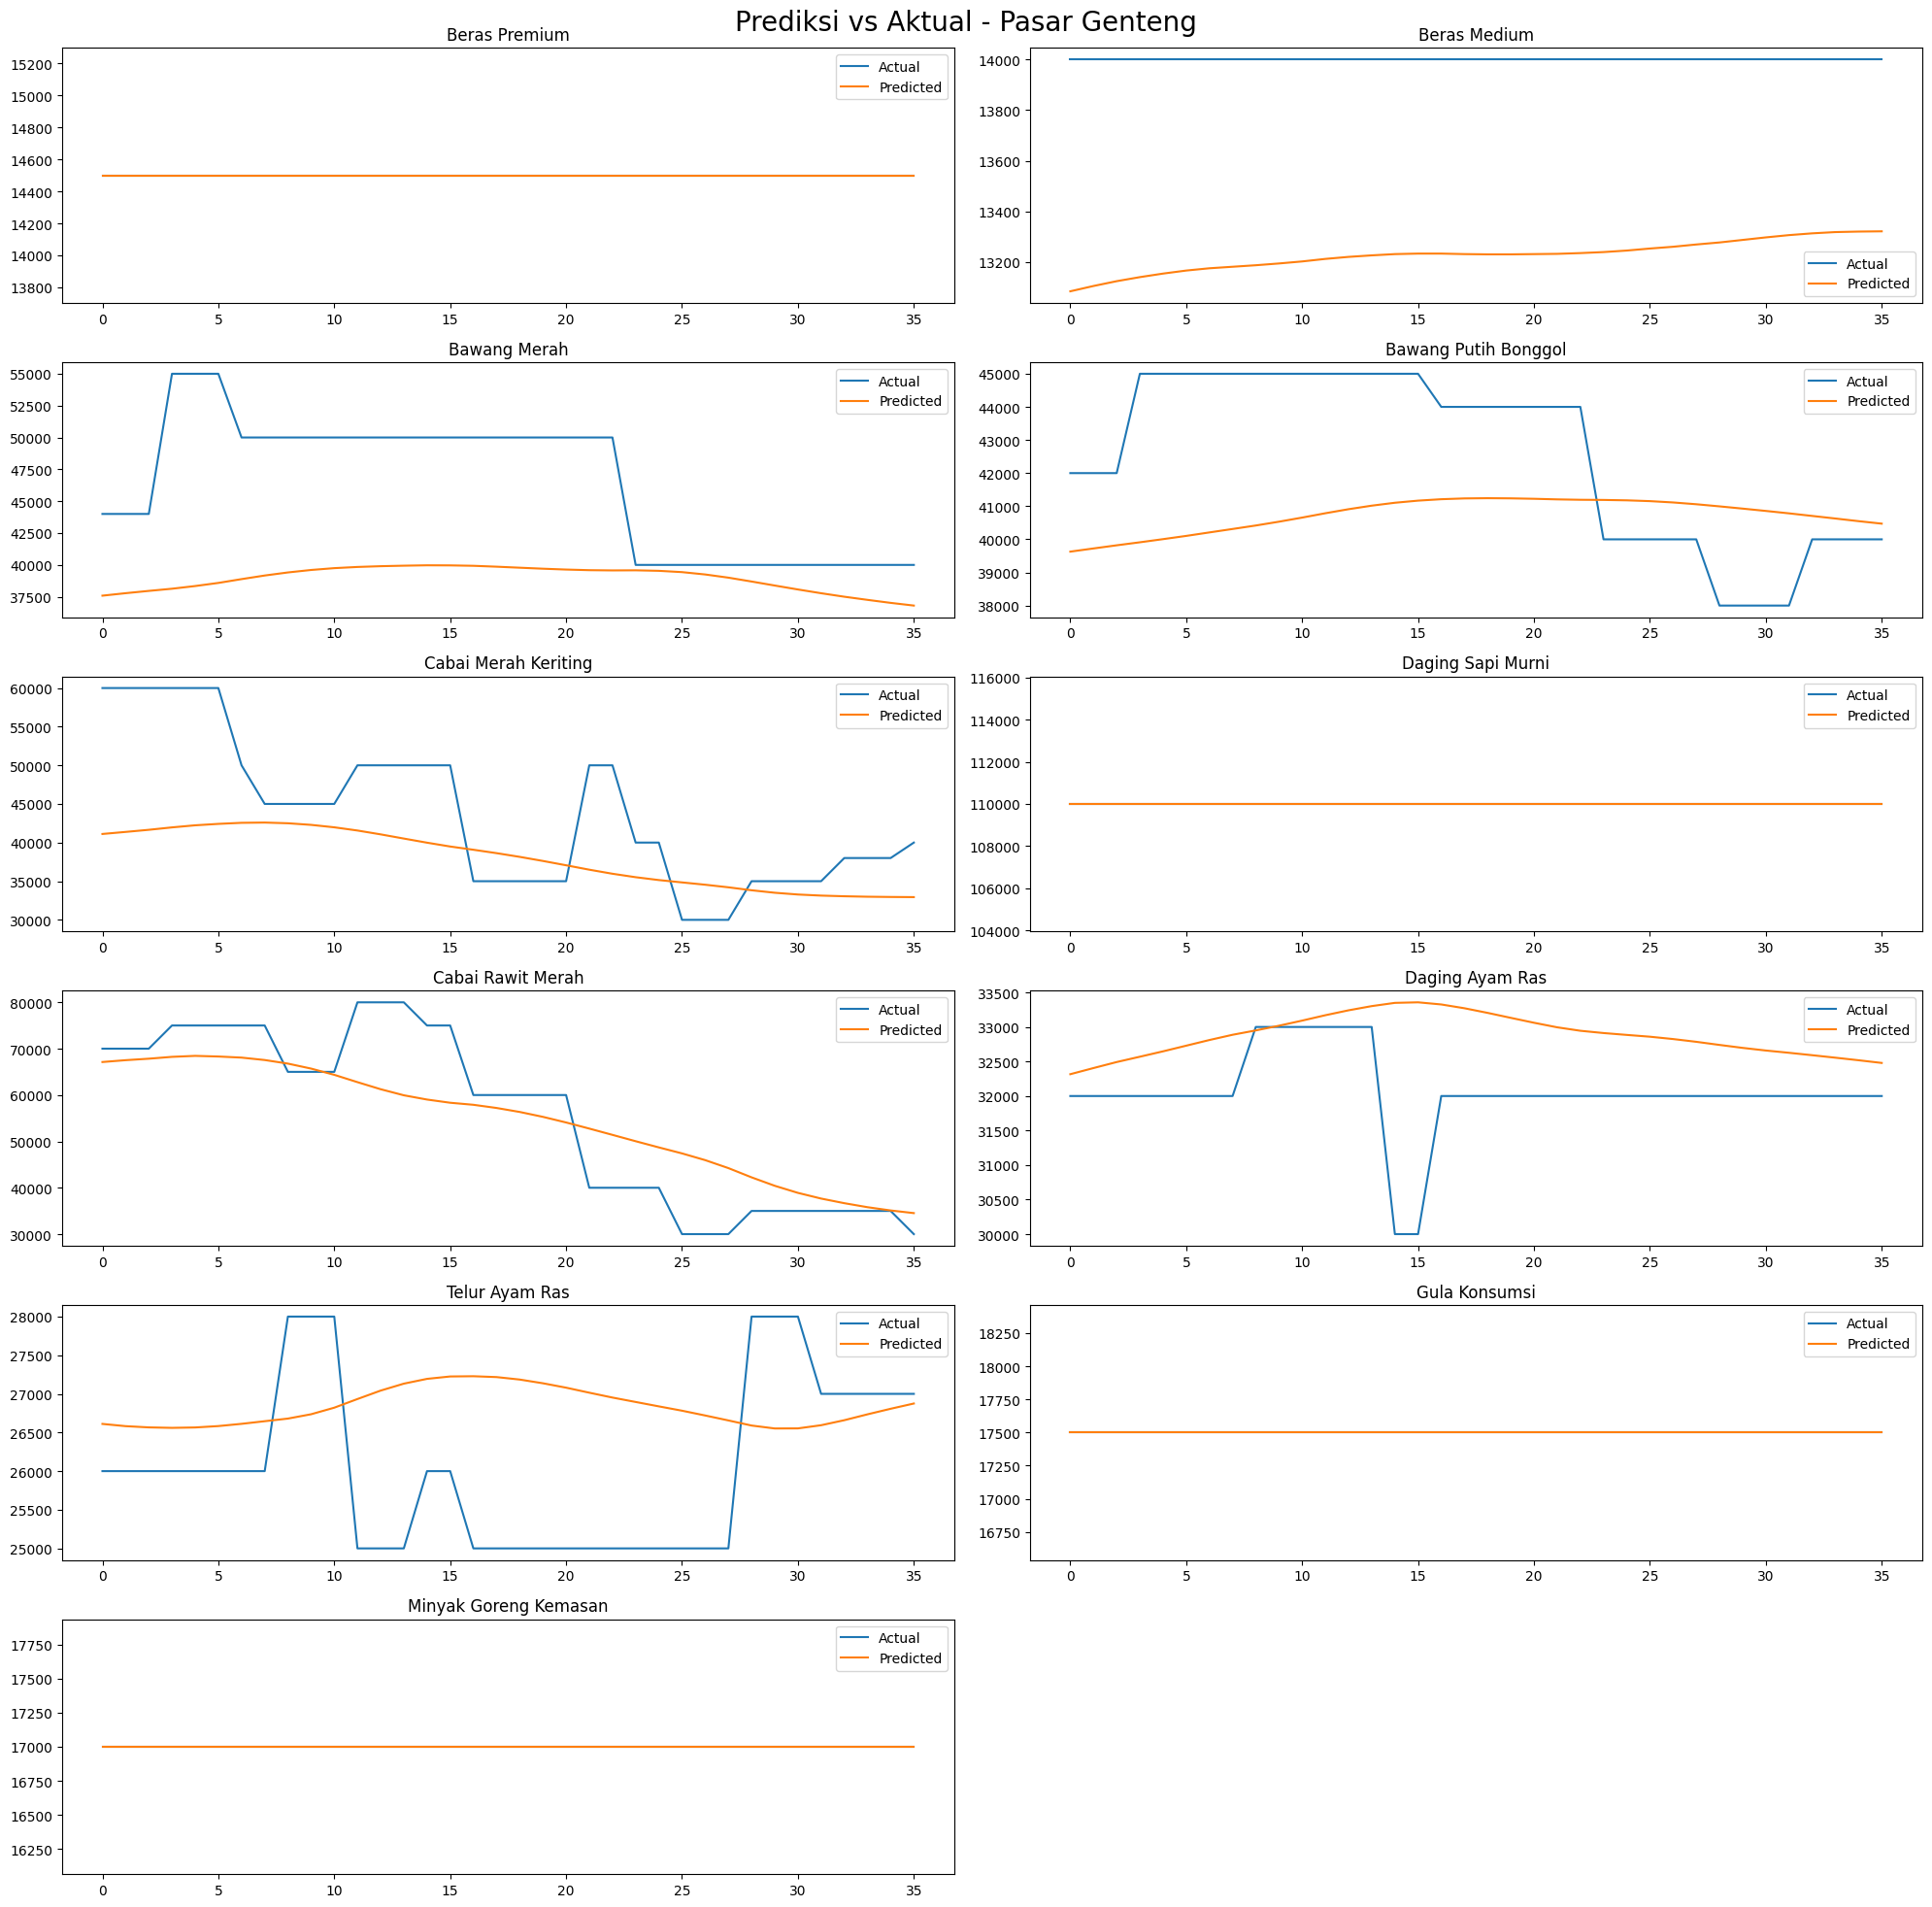


RMSE per Komoditas (Genteng):
Beras Premium            : 0.00
Beras Medium             : 775.56
Bawang Merah             : 8833.53
Bawang Putih Bonggol     : 3208.84
Cabai Merah Keriting     : 9422.11
Daging Sapi Murni        : 0.00
Cabai Rawit Merah        : 9551.30
Daging Ayam Ras          : 1075.96
Telur Ayam Ras           : 1460.12
Gula Konsumsi            : 0.00
Minyak Goreng Kemasan    : 0.00

Contoh 5 data setelah preprocessing untuk Pucanganom:
     Tanggal  Beras Premium  Beras Medium  Bawang Merah  Bawang Putih Bonggol  \
0 2025-04-01          16000         14500         40000                 48000   
1 2025-04-02          16000         14500         40000                 48000   
2 2025-04-03          16000         14500         45000                 50000   
3 2025-04-04          16000         14500         45000                 50000   
4 2025-04-05          16000         14500         48000                 50000   

   Cabai Merah Keriting  Daging Sapi Murni  Cabai Rawit

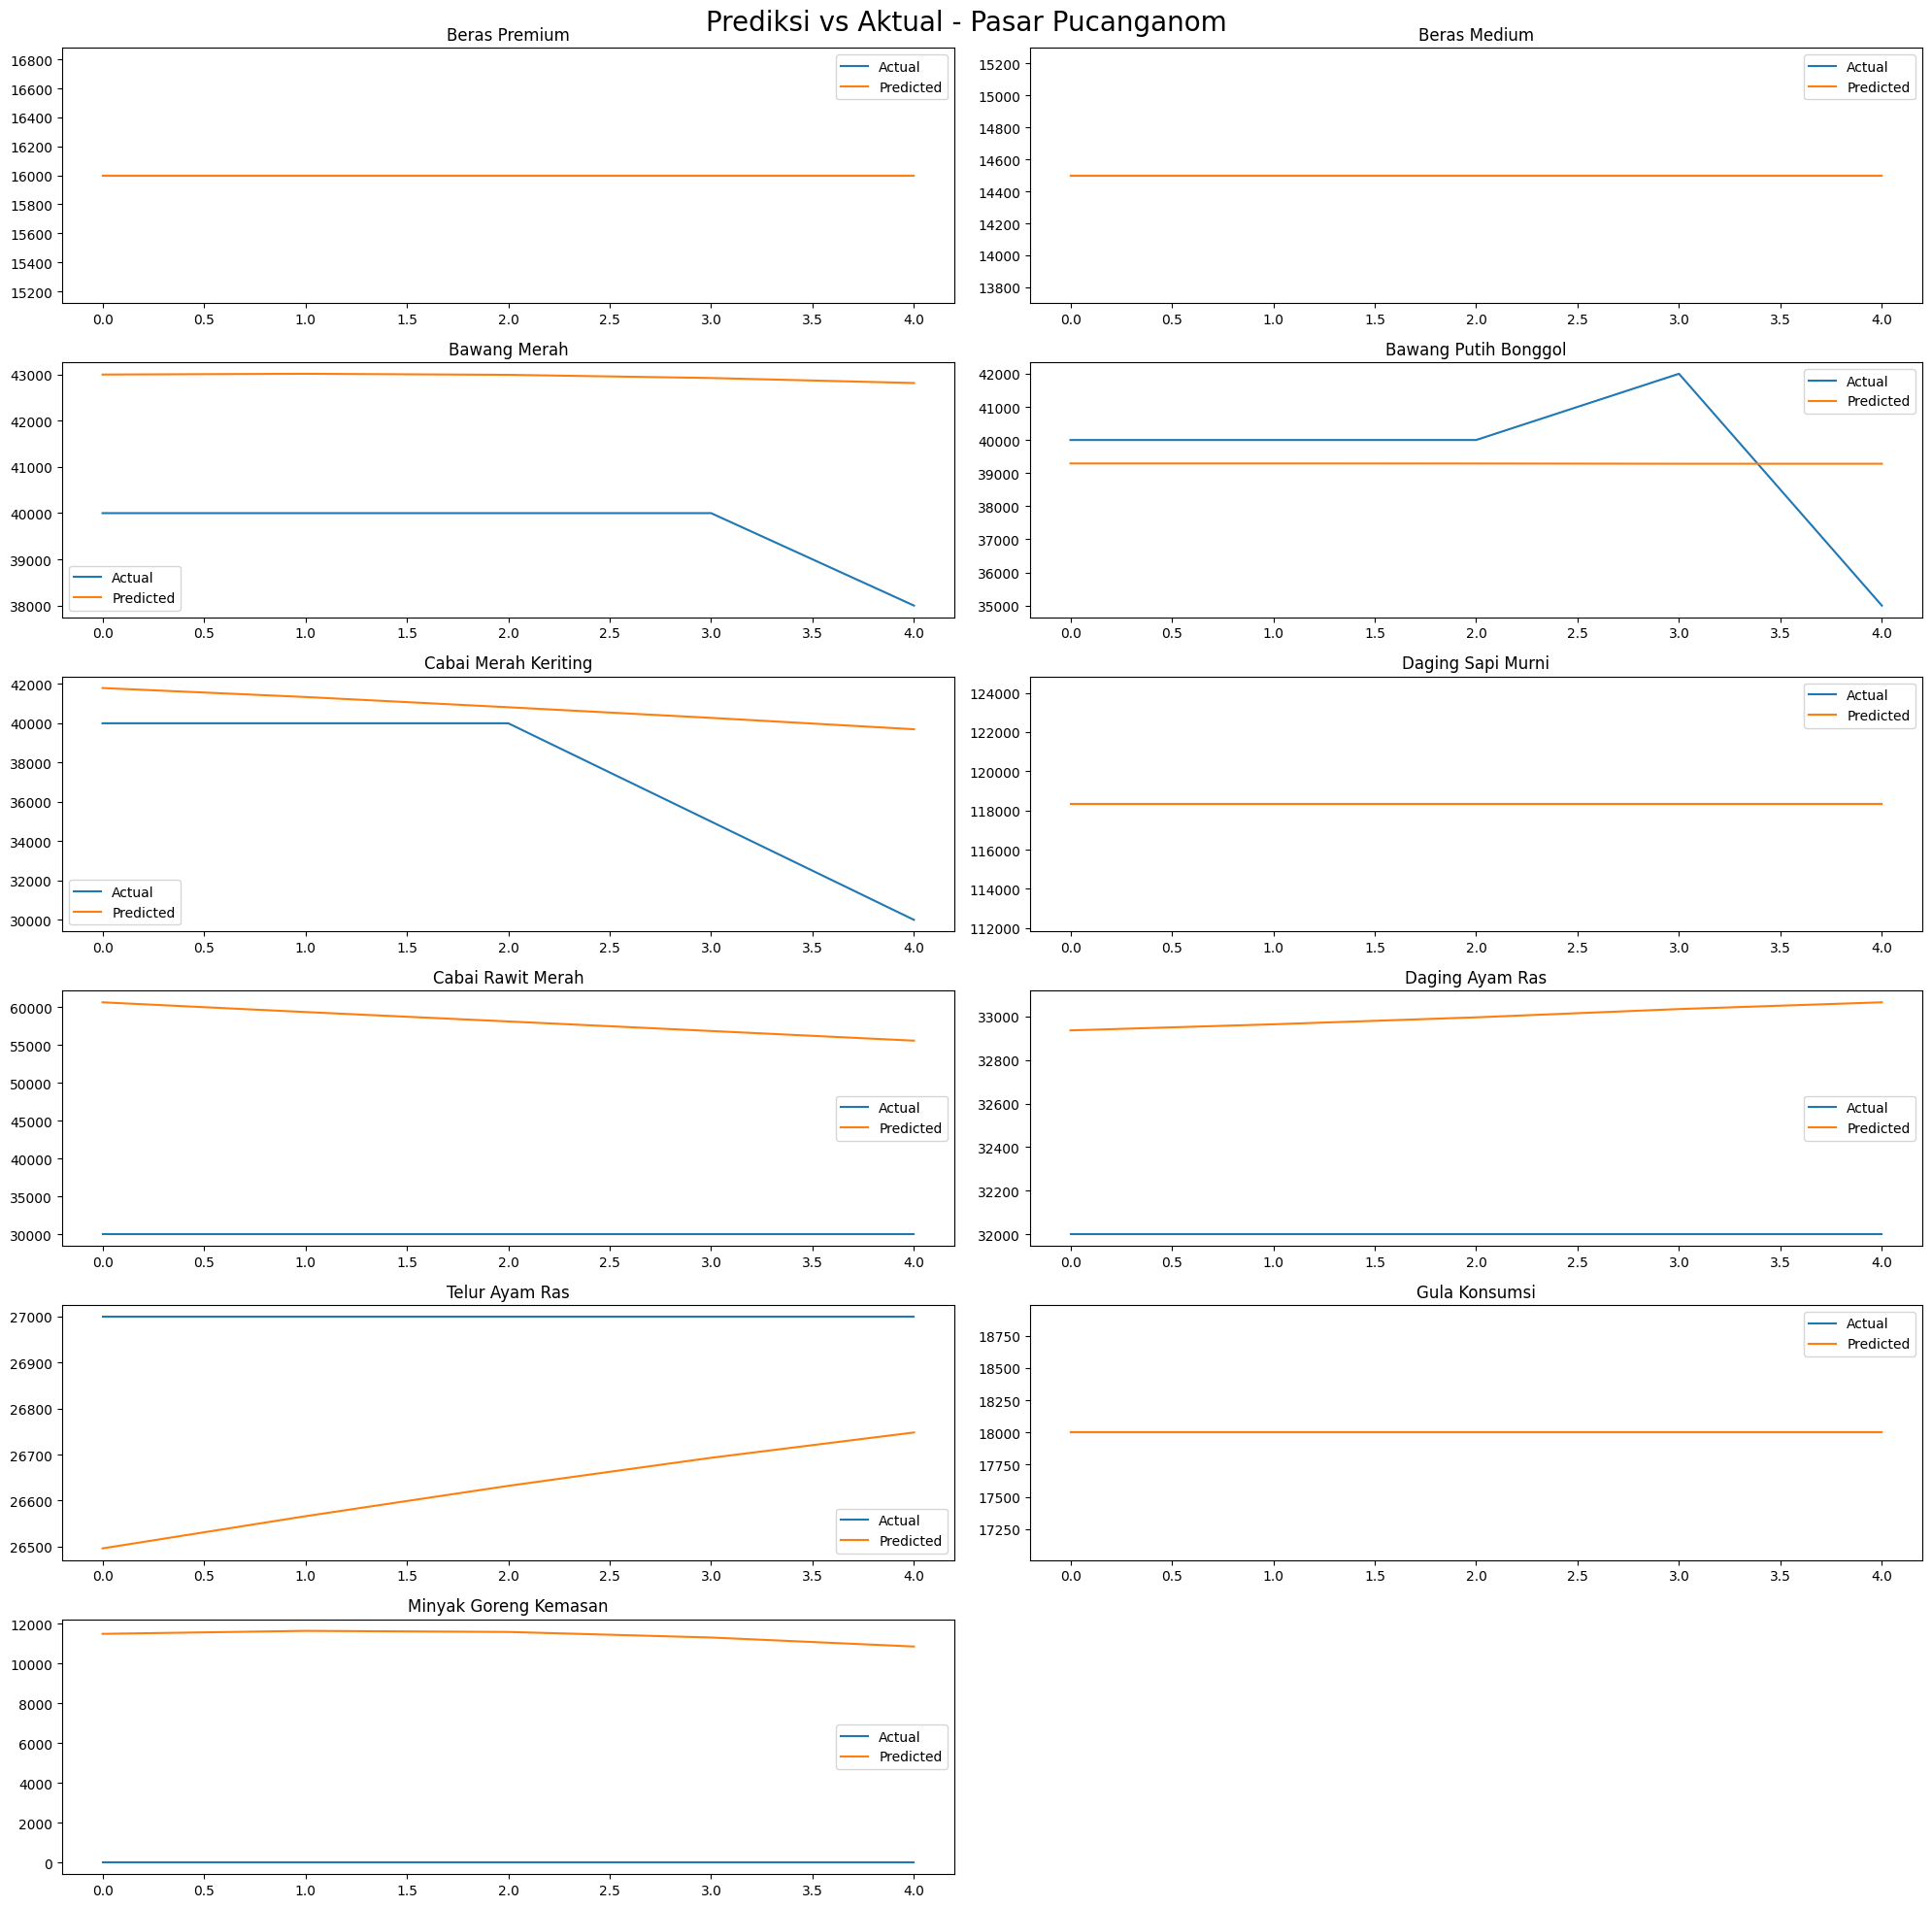


RMSE per Komoditas (Pucanganom):
Beras Premium            : 0.00
Beras Medium             : 0.00
Bawang Merah             : 3429.05
Bawang Putih Bonggol     : 2333.79
Cabai Merah Keriting     : 5050.09
Daging Sapi Murni        : 0.00
Cabai Rawit Merah        : 28180.26
Daging Ayam Ras          : 1000.08
Telur Ayam Ras           : 383.55
Gula Konsumsi            : 0.00
Minyak Goreng Kemasan    : 11387.95

Contoh 5 data setelah preprocessing untuk Soponyono:
     Tanggal  Beras Premium  Beras Medium  Bawang Merah  Bawang Putih Bonggol  \
0 2025-04-01          15400         12500         45000                 42000   
1 2025-04-02          15400         12500         45000                 42000   
2 2025-04-03          15400         12500         50000                 50000   
3 2025-04-04          15400         12500         50000                 50000   
4 2025-04-05          15400         12500         50000                 50000   

   Cabai Merah Keriting  Daging Sapi Murni  Cabai R

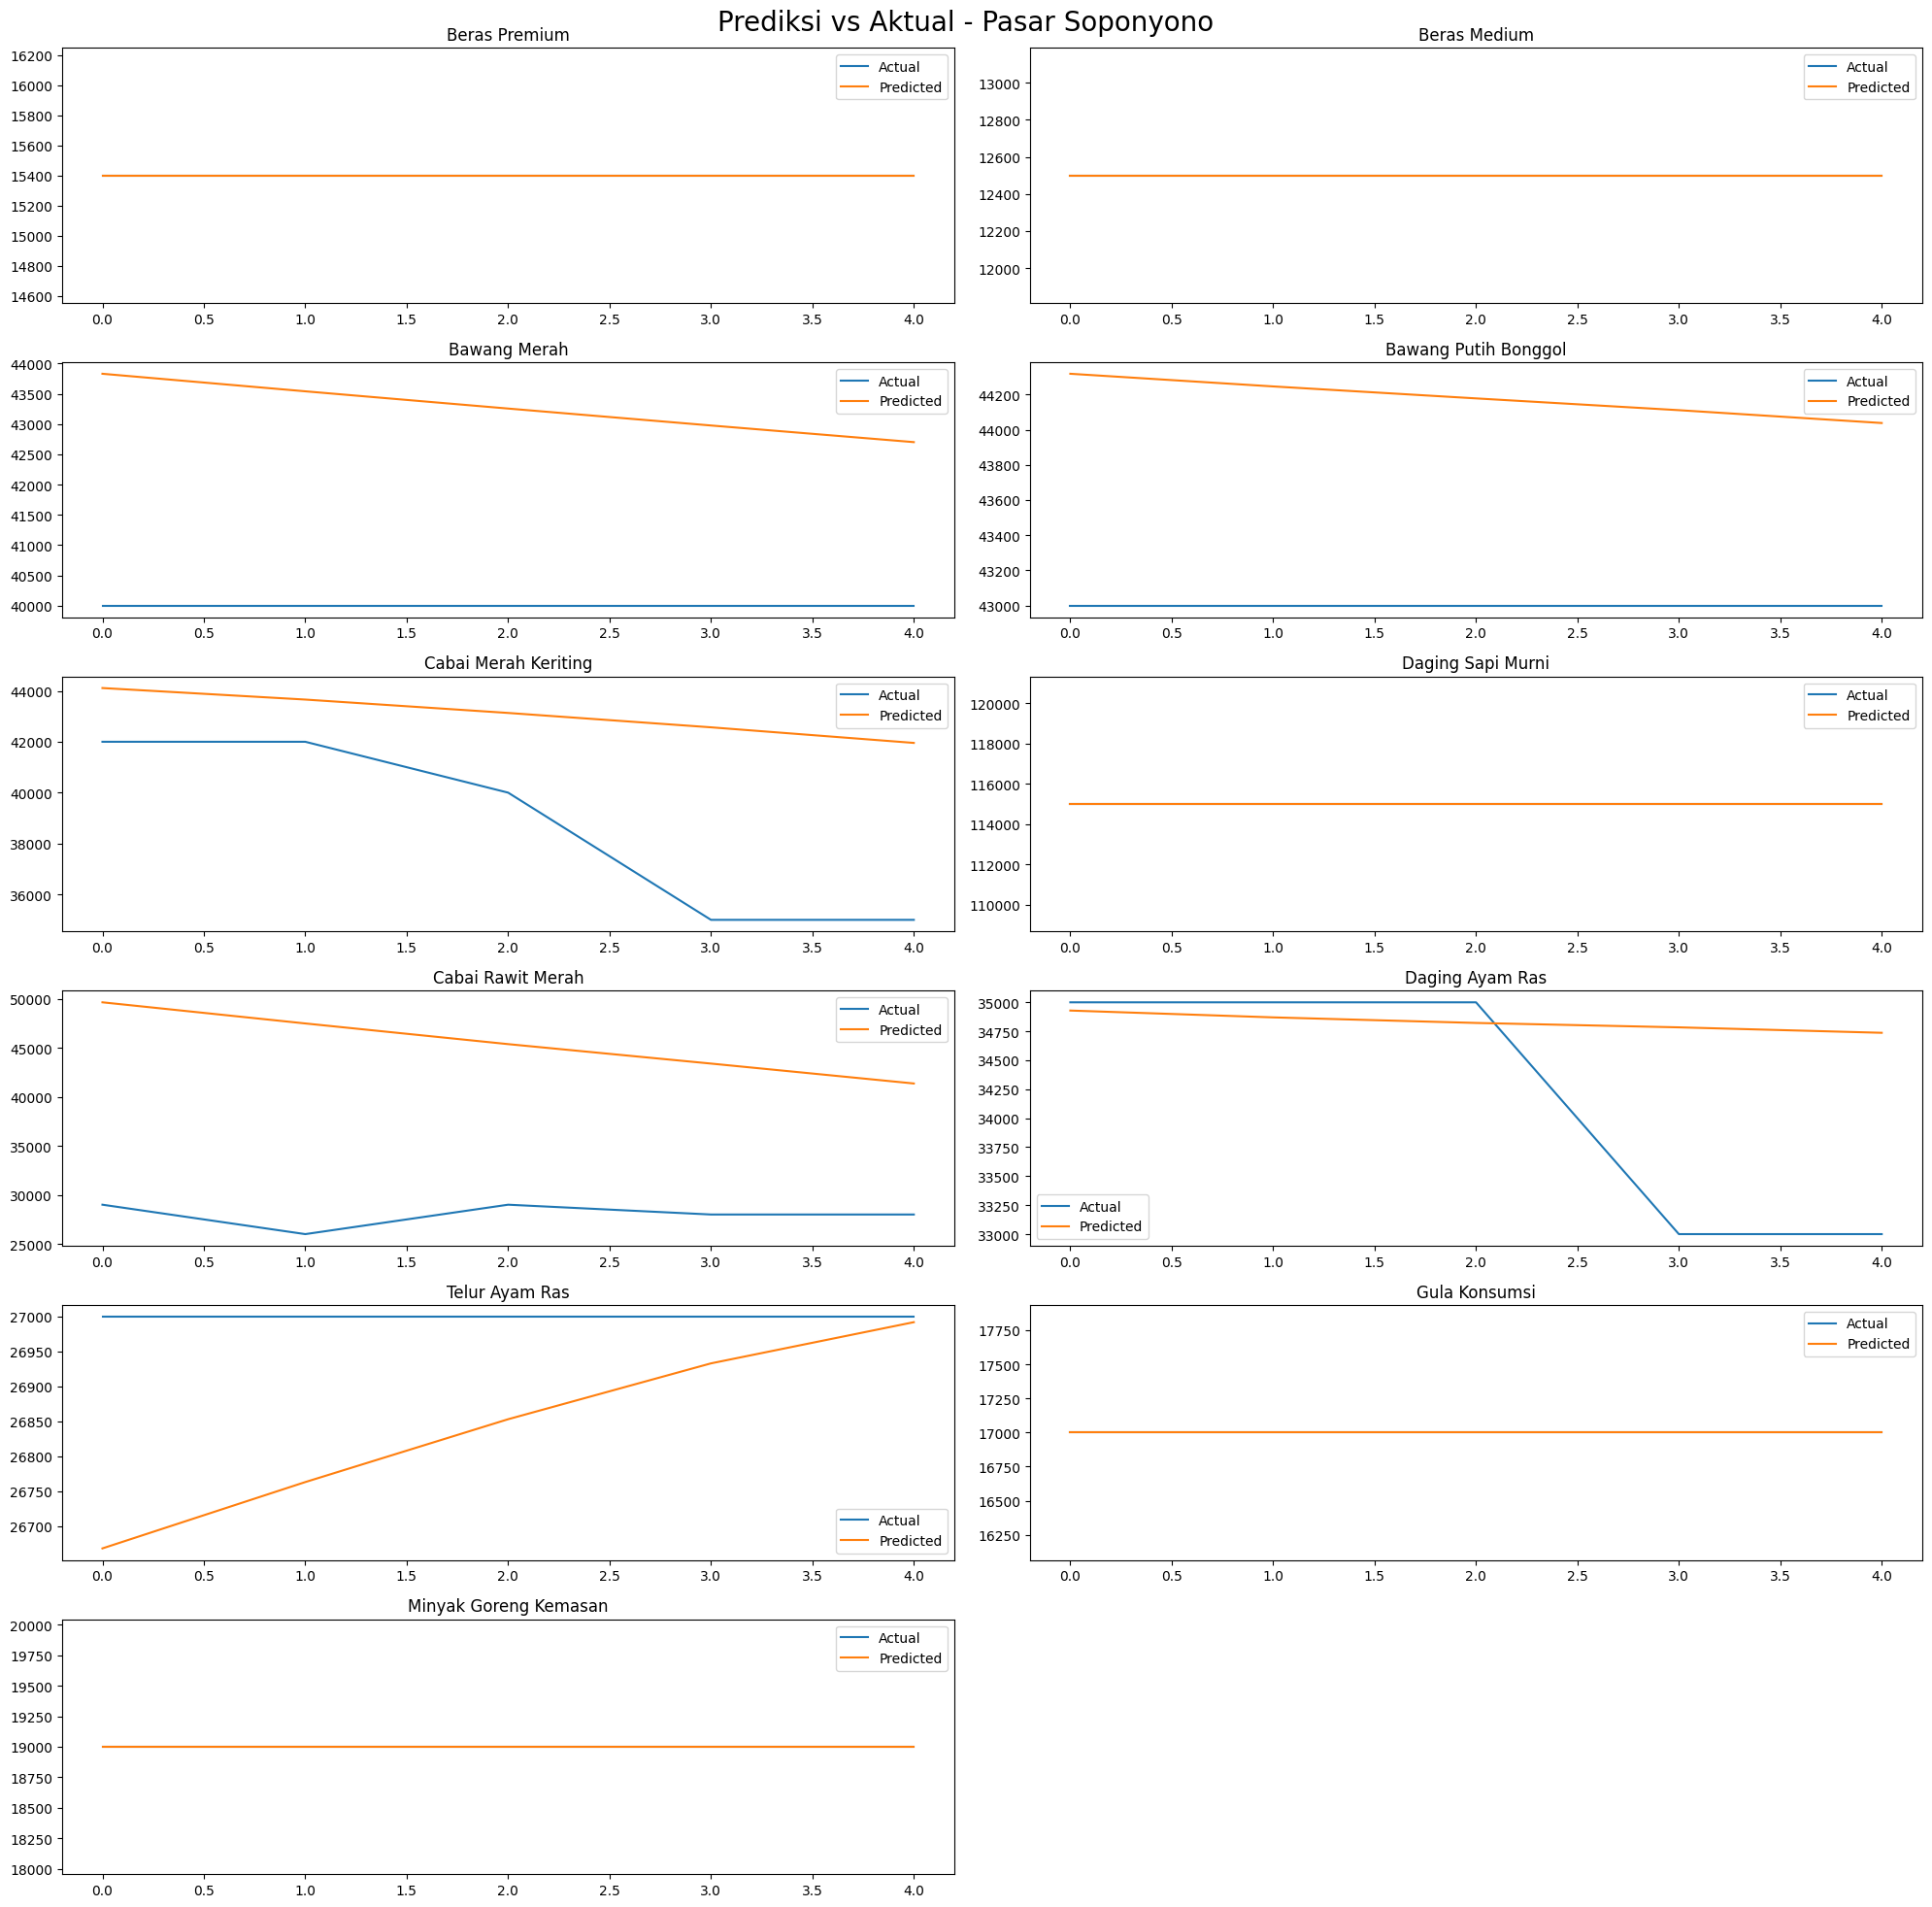


RMSE per Komoditas (Soponyono):
Beras Premium            : 0.00
Beras Medium             : 0.00
Bawang Merah             : 3286.38
Bawang Putih Bonggol     : 1182.29
Cabai Merah Keriting     : 4953.29
Daging Sapi Murni        : 0.00
Cabai Rawit Merah        : 17721.16
Daging Ayam Ras          : 1118.34
Telur Ayam Ras           : 196.24
Gula Konsumsi            : 0.00
Minyak Goreng Kemasan    : 0.00

Contoh 5 data setelah preprocessing untuk Tambahrejo:
     Tanggal  Beras Premium  Beras Medium  Bawang Merah  Bawang Putih Bonggol  \
0 2025-04-01          15500         12500         40000                 38000   
1 2025-04-02          15500         12500         40000                 38000   
2 2025-04-03          15500         12500         40000                 38000   
3 2025-04-04          15500         12500         40000                 38000   
4 2025-04-05          15500         12500         40000                 38000   

   Cabai Merah Keriting  Daging Sapi Murni  Cabai Rawit

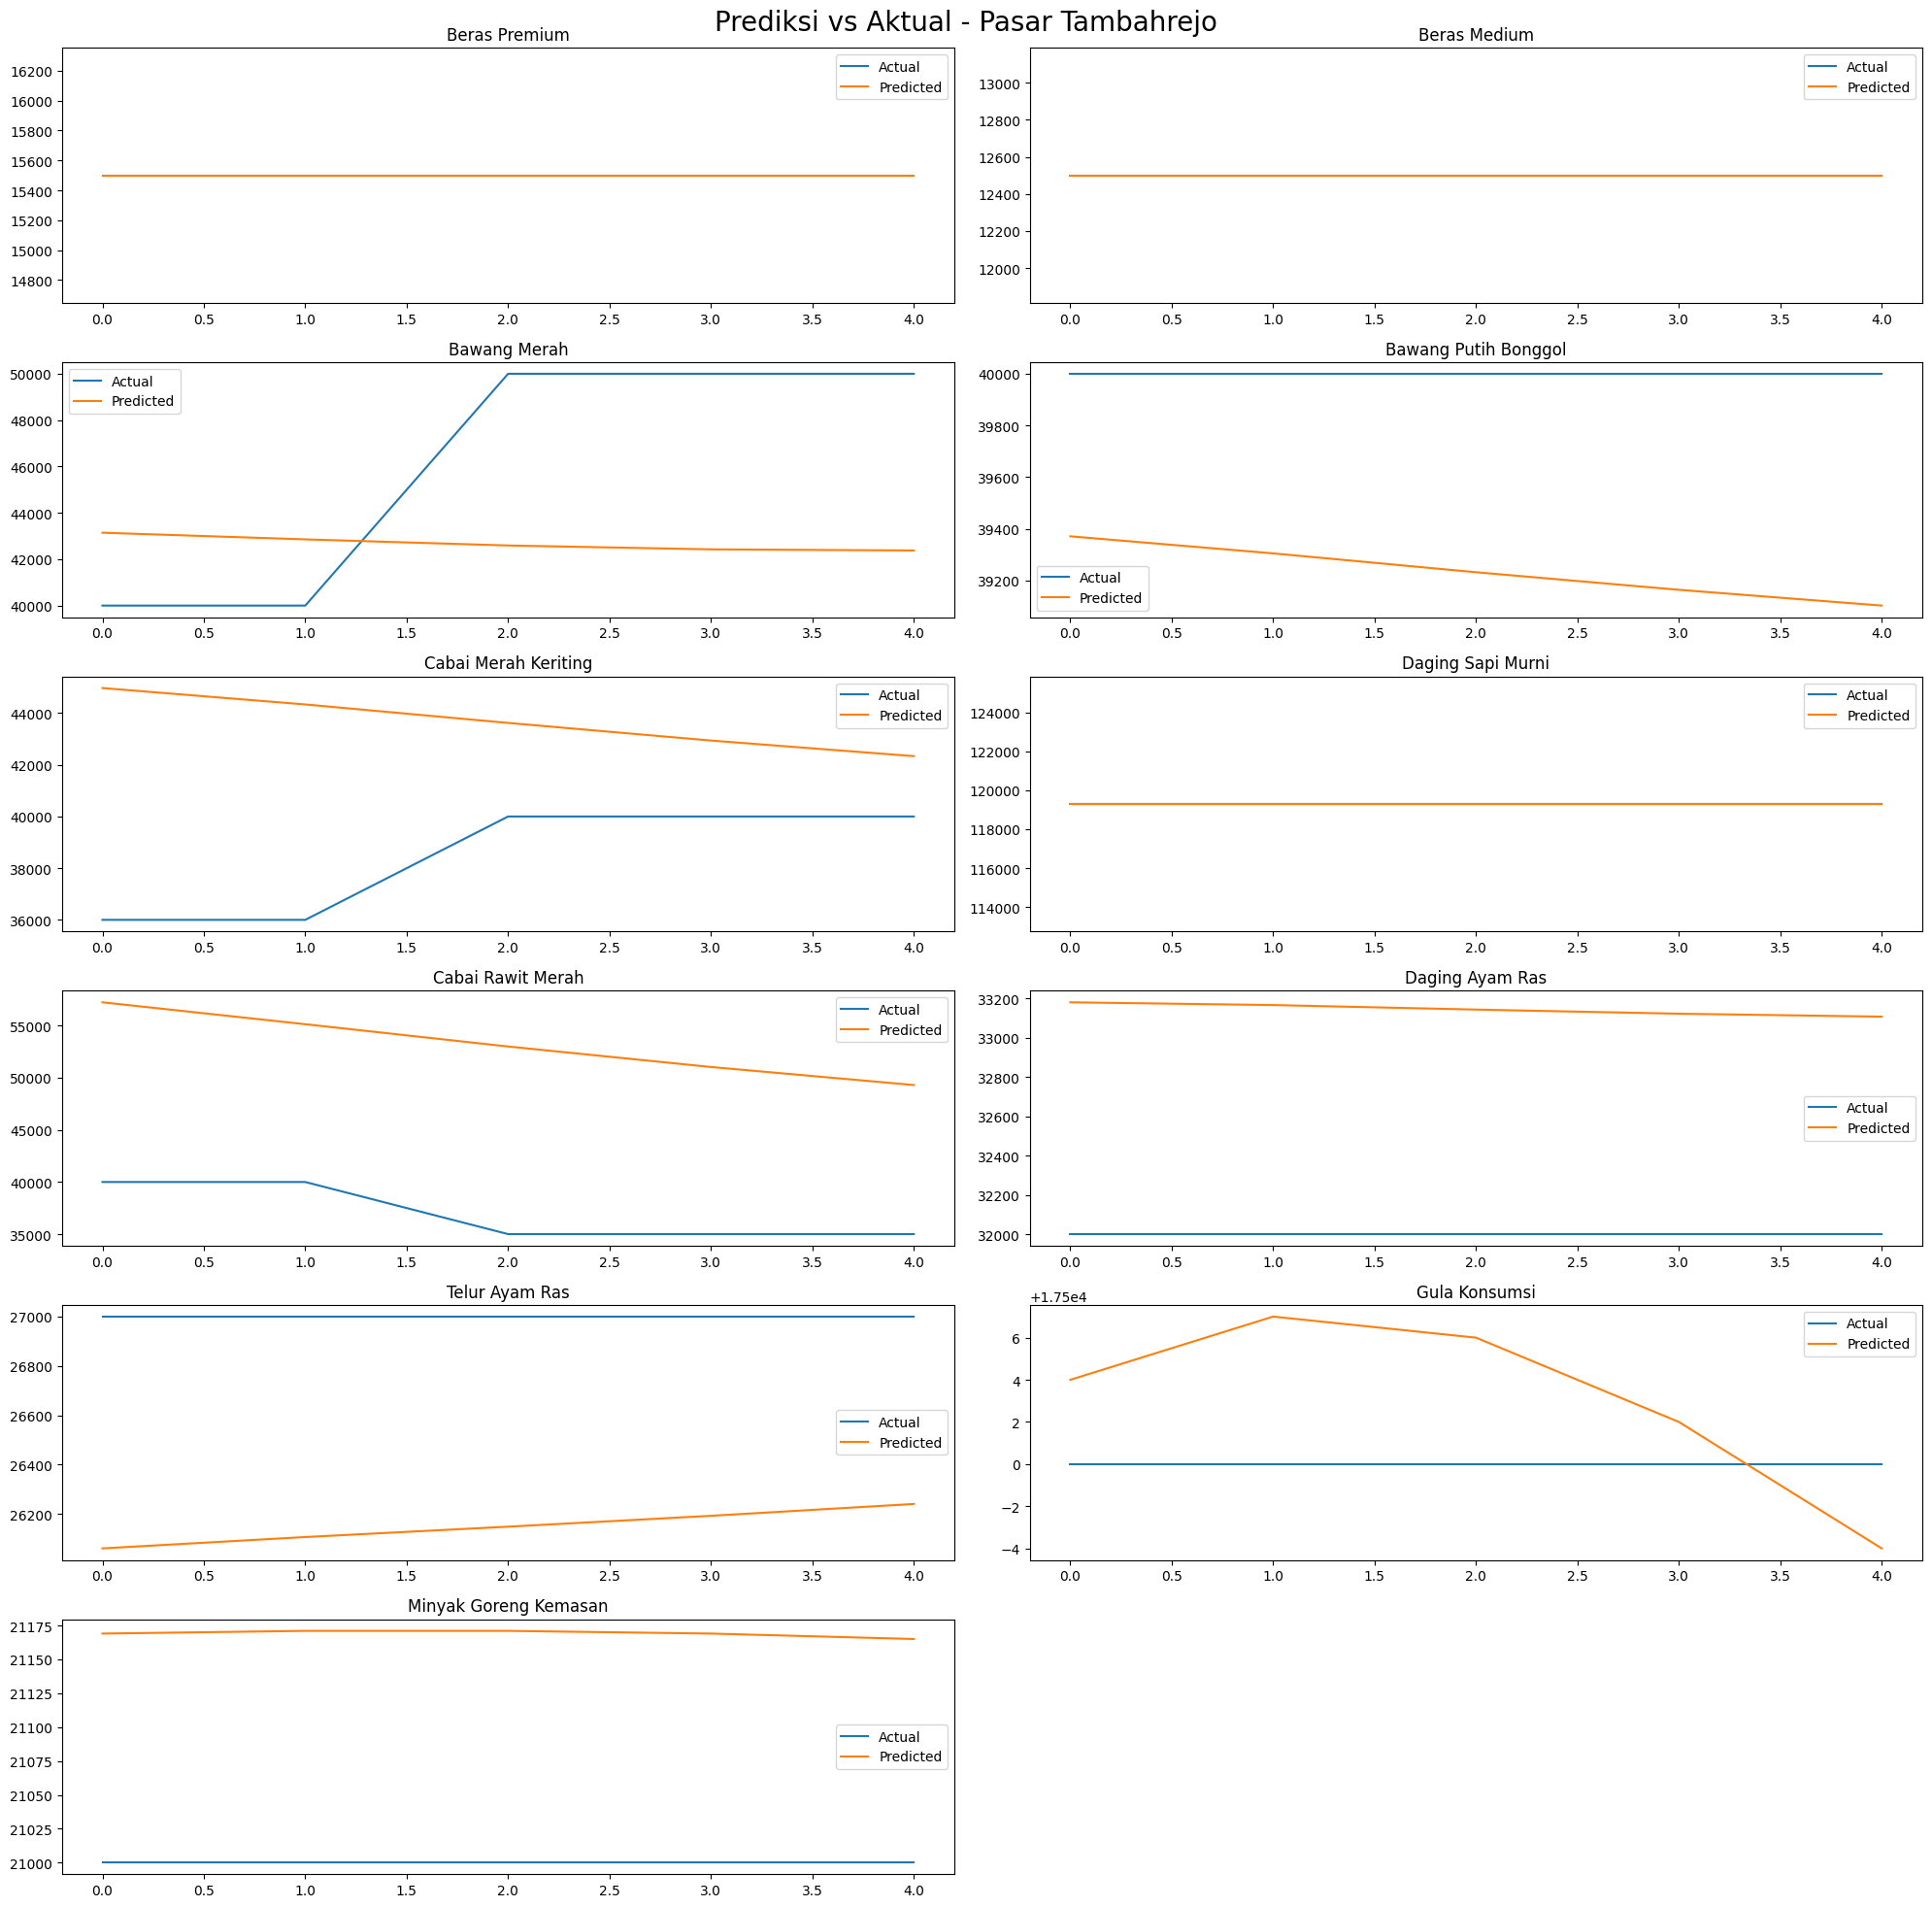


RMSE per Komoditas (Tambahrejo):
Beras Premium            : 0.00
Beras Medium             : 0.00
Bawang Merah             : 6138.48
Bawang Putih Bonggol     : 770.97
Cabai Merah Keriting     : 5952.64
Daging Sapi Murni        : 0.00
Cabai Rawit Merah        : 16196.81
Daging Ayam Ras          : 1143.92
Telur Ayam Ras           : 852.14
Gula Konsumsi            : 4.92
Minyak Goreng Kemasan    : 169.01

Contoh 5 data setelah preprocessing untuk Wonokromo:
     Tanggal  Beras Premium  Beras Medium  Bawang Merah  Bawang Putih Bonggol  \
0 2025-04-01          16000         12500         45000                 45000   
1 2025-04-02          16000         12500         45000                 45000   
2 2025-04-03          16000         12500         60000                 65000   
3 2025-04-04          16000         12500         45000                 42000   
4 2025-04-05          16000         12500         42000                 42000   

   Cabai Merah Keriting  Daging Sapi Murni  Cabai Rawi

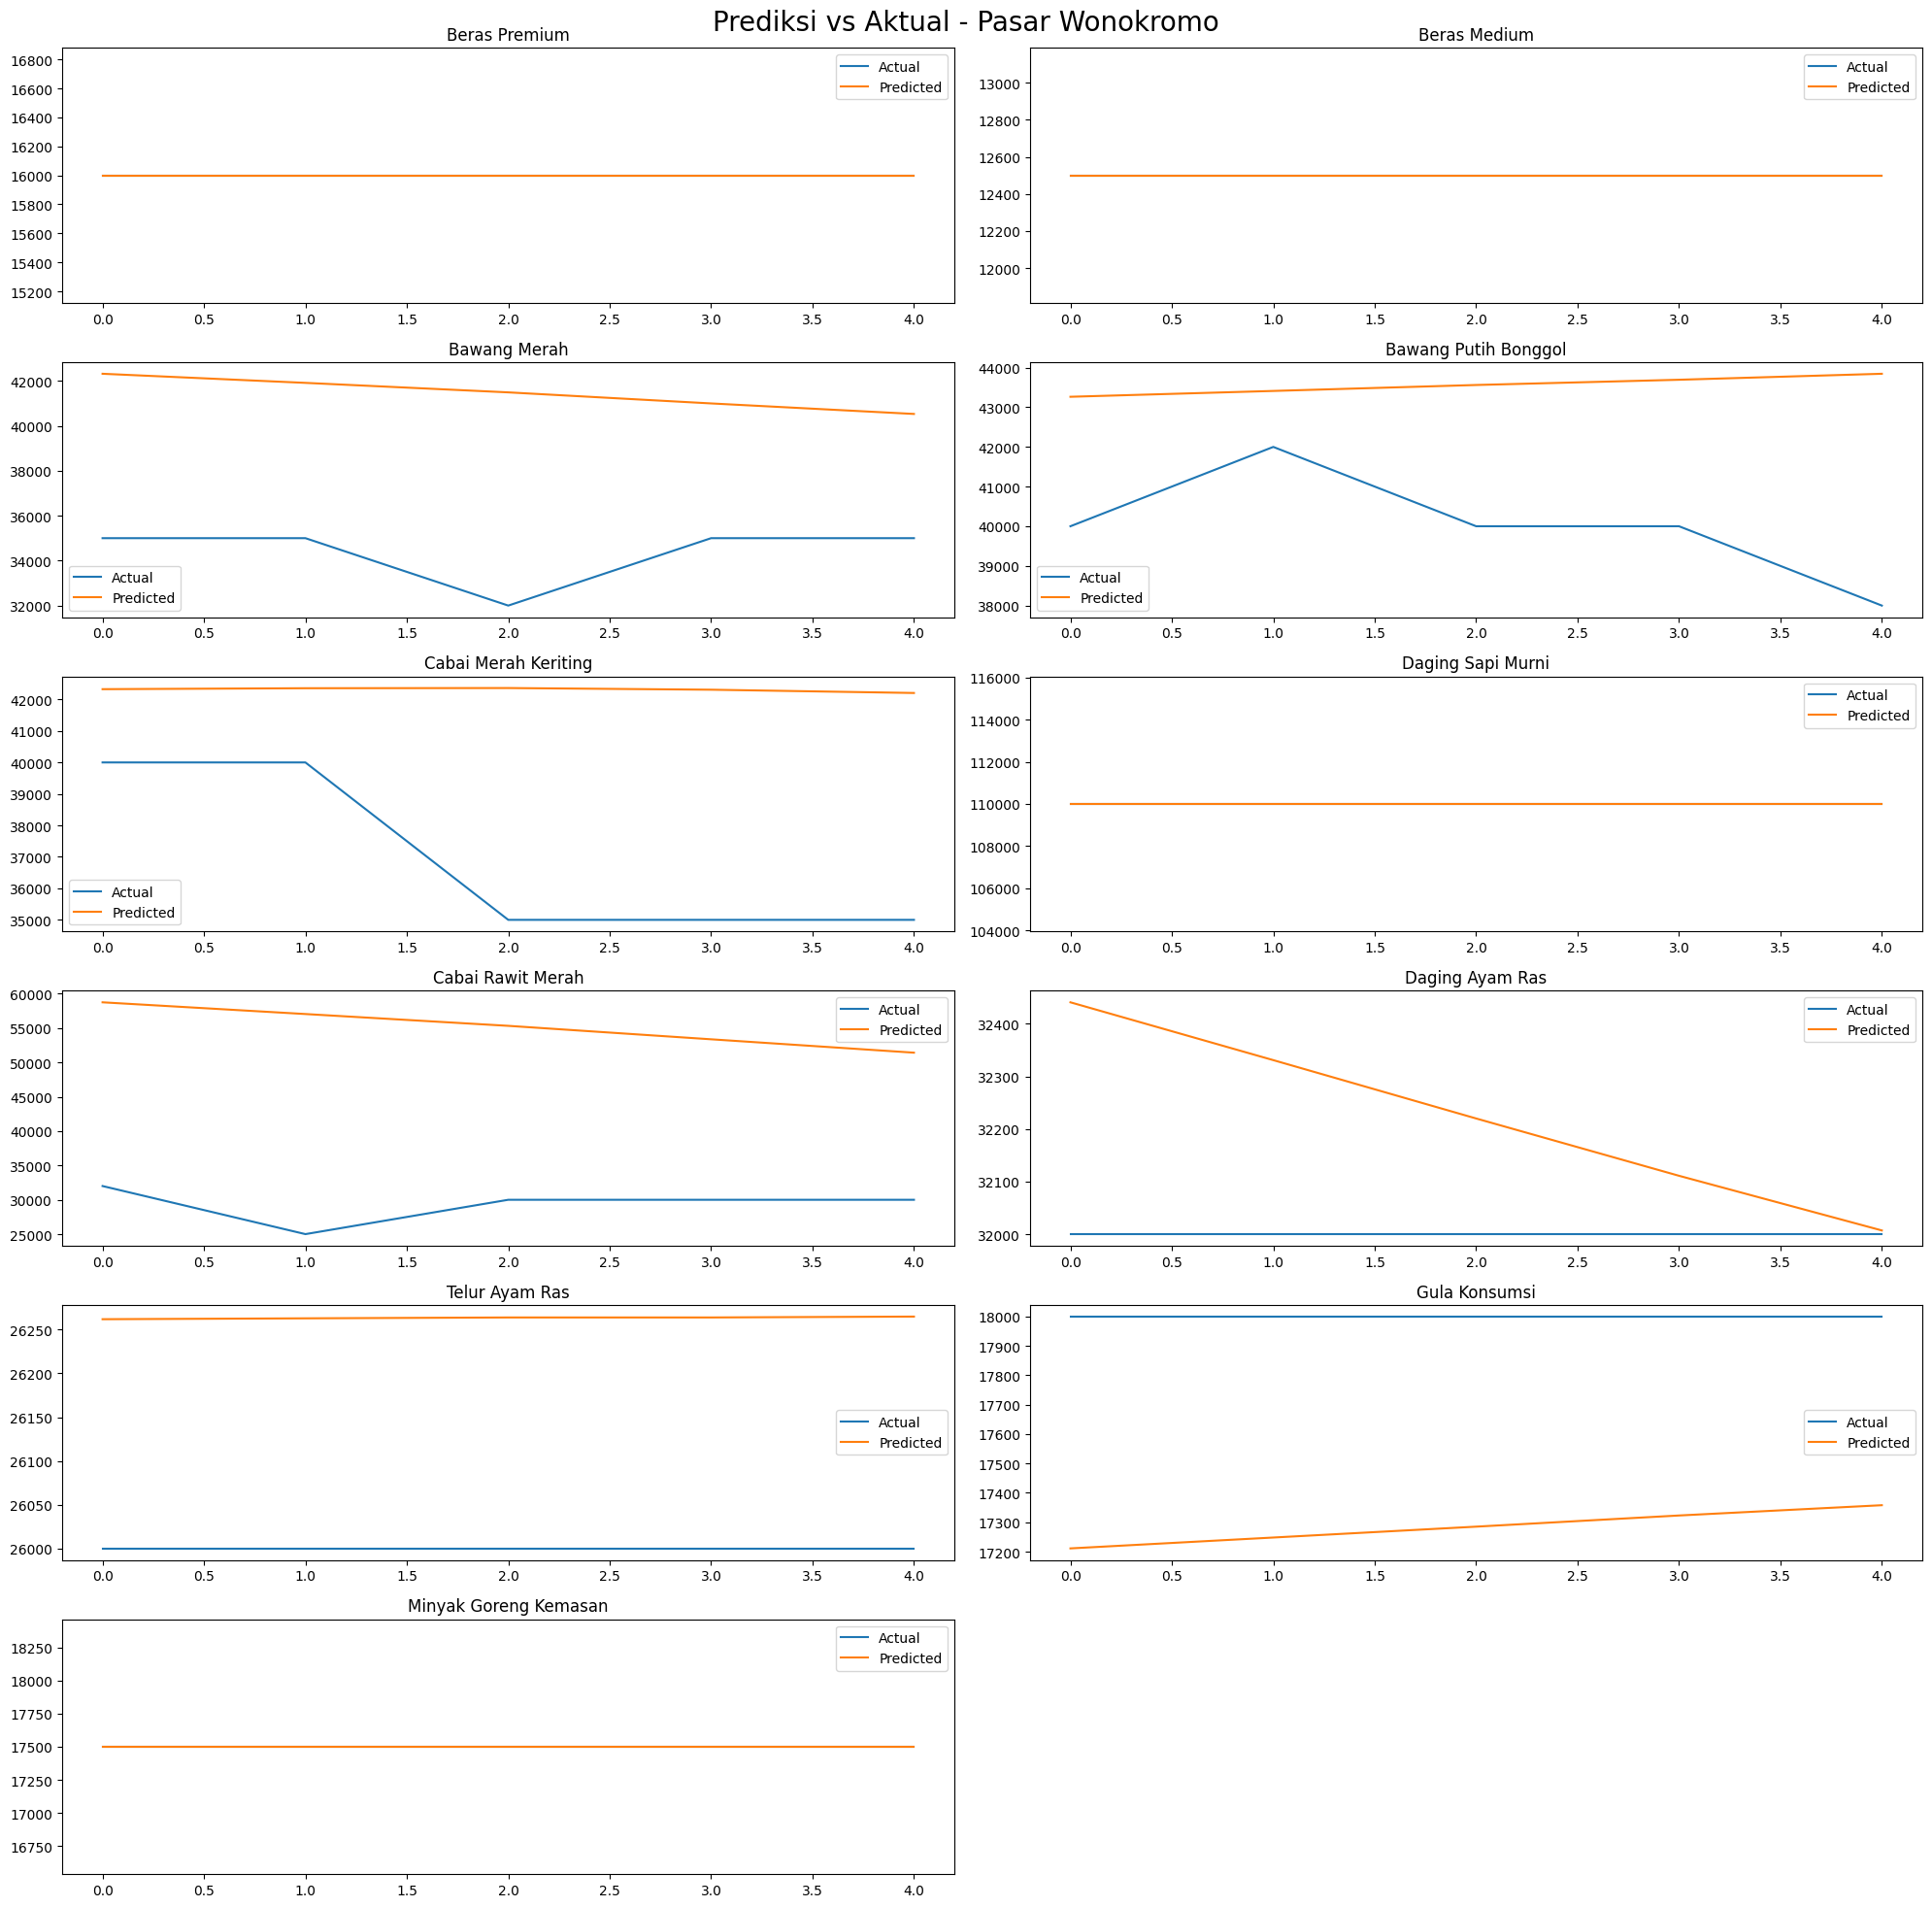


RMSE per Komoditas (Wonokromo):
Beras Premium            : 0.00
Beras Medium             : 0.00
Bawang Merah             : 7181.77
Bawang Putih Bonggol     : 3824.03
Cabai Merah Keriting     : 5840.32
Daging Sapi Murni        : 0.00
Cabai Rawit Merah        : 26032.43
Daging Ayam Ras          : 270.12
Telur Ayam Ras           : 263.60
Gula Konsumsi            : 716.90
Minyak Goreng Kemasan    : 0.00


In [29]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

# Load model LSTM
model = load_model("lstm_bapokting.keras")

# List file data pasar
file_paths = [
    "harga_bapokting_pasar_genteng.xlsx",
    "harga_bapokting_pasar_pucanganom.xlsx",
    "harga_bapokting_pasar_soponyono.xlsx",
    "harga_bapokting_pasar_tambahrejo.xlsx",
    "harga_bapokting_pasar_wonokromo.xlsx"
]

# Nama pasar yang sesuai dengan file
nama_pasars = [
    "Genteng", 
    "Pucanganom", 
    "Soponyono", 
    "Tambahrejo", 
    "Wonokromo"
]

# Kolom yang digunakan
selected_columns = [
    "Beras Premium", "Beras Medium", "Bawang Merah", "Bawang Putih Bonggol",
    "Cabai Merah Keriting", "Daging Sapi Murni", "Cabai Rawit Merah",
    "Daging Ayam Ras", "Telur Ayam Ras", "Gula Konsumsi",
    "Minyak Goreng Kemasan"
]

sequence_length = 30

# Fungsi membuat sequence LSTM
def prepare_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

# Fungsi untuk menangani nilai 0 dengan rata-rata bulanan atau bulan berikutnya
def preprocess_zero_values(df, selected_columns):
    df['Tanggal'] = pd.to_datetime(df['Tanggal'])
    df.set_index('Tanggal', inplace=True)

    for col in selected_columns:
        for date, value in df[col].items():
            if value == 0:
                bulan_ini = date.month
                tahun_ini = date.year

                # Ambil rata-rata nilai non-zero di bulan yang sama
                same_month_values = df[(df.index.month == bulan_ini) & 
                                       (df.index.year == tahun_ini) & 
                                       (df[col] != 0)][col]

                if not same_month_values.empty:
                    df.at[date, col] = same_month_values.mean()
                else:
                    # Ambil rata-rata bulan berikutnya
                    bulan_berikut = bulan_ini + 1
                    tahun_berikut = tahun_ini
                    if bulan_berikut > 12:
                        bulan_berikut = 1
                        tahun_berikut += 1

                    next_month_values = df[(df.index.month == bulan_berikut) & 
                                           (df.index.year == tahun_berikut) & 
                                           (df[col] != 0)][col]

                    if not next_month_values.empty:
                        df.at[date, col] = next_month_values.mean()
                    # Jika masih kosong, biarkan 0 (bisa dikembangkan ke interpolasi)

    df.reset_index(inplace=True)
    return df

# Fungsi prediksi dan visualisasi
def predict_and_plot(name, df, model):
    # Preprocessing nilai 0
    df = preprocess_zero_values(df, selected_columns)

    # Debug: tampilkan 5 data setelah preprocessing
    print(f"\nContoh 5 data setelah preprocessing untuk {name}:")
    print(df[['Tanggal'] + selected_columns].head(5))

    # Drop NA dan ambil kolom yang dipilih
    df = df[['Tanggal'] + selected_columns].dropna()
    df_values = df[selected_columns]

    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(df_values)
    
    X, y_true = prepare_sequences(scaled, sequence_length)
    y_pred = model.predict(X)
    
    # Inverse scaling
    y_true_inv = scaler.inverse_transform(y_true)
    y_pred_inv = scaler.inverse_transform(y_pred)

    # Bulatkan hasil prediksi dan aktual menjadi bilangan bulat
    y_true_inv = np.round(y_true_inv).astype(int)
    y_pred_inv = np.round(y_pred_inv).astype(int)

    # Plot setiap variabel
    plt.figure(figsize=(20, 20))
    for i in range(len(selected_columns)):
        plt.subplot(6, 2, i + 1)
        plt.plot(y_true_inv[:, i], label='Actual')
        plt.plot(y_pred_inv[:, i], label='Predicted')
        plt.title(selected_columns[i])
        plt.legend()
    plt.suptitle(f"Prediksi vs Aktual - Pasar {name}", fontsize=20)
    plt.tight_layout()
    plt.show()

    # Hitung dan tampilkan RMSE
    print(f"\nRMSE per Komoditas ({name}):")
    for i, col in enumerate(selected_columns):
        rmse = np.sqrt(np.mean((y_true_inv[:, i] - y_pred_inv[:, i]) ** 2))
        print(f"{col:<25}: {rmse:.2f}")

# Proses untuk setiap file pasar
for file_path, nama_pasar in zip(file_paths, nama_pasars):
    df = pd.read_excel(file_path)
    predict_and_plot(nama_pasar, df, model)


Prediksi dengan dataset Baru

📈 Prediksi Harga 30 Hari ke Depan:
            Beras Premium  Beras Medium  Bawang Merah  Bawang Putih Bonggol  \
2025-05-06          14500         13319         36617                 40406   
2025-05-07          14500         13315         36433                 40346   
2025-05-08          14500         13307         36249                 40293   
2025-05-09          14500         13297         36060                 40250   
2025-05-10          14500         13284         35874                 40214   
2025-05-11          14500         13270         35695                 40182   
2025-05-12          14500         13255         35534                 40152   
2025-05-13          14500         13240         35380                 40127   
2025-05-14          14500         13225         35235                 40105   
2025-05-15          14500         13210         35094                 40083   
2025-05-16          14500         13195         34962                 40064   
2025-05-17       

C:\Users\ASUS1\AppData\Local\Temp\ipykernel_2328\2467471128.py:78: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ASUS1\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


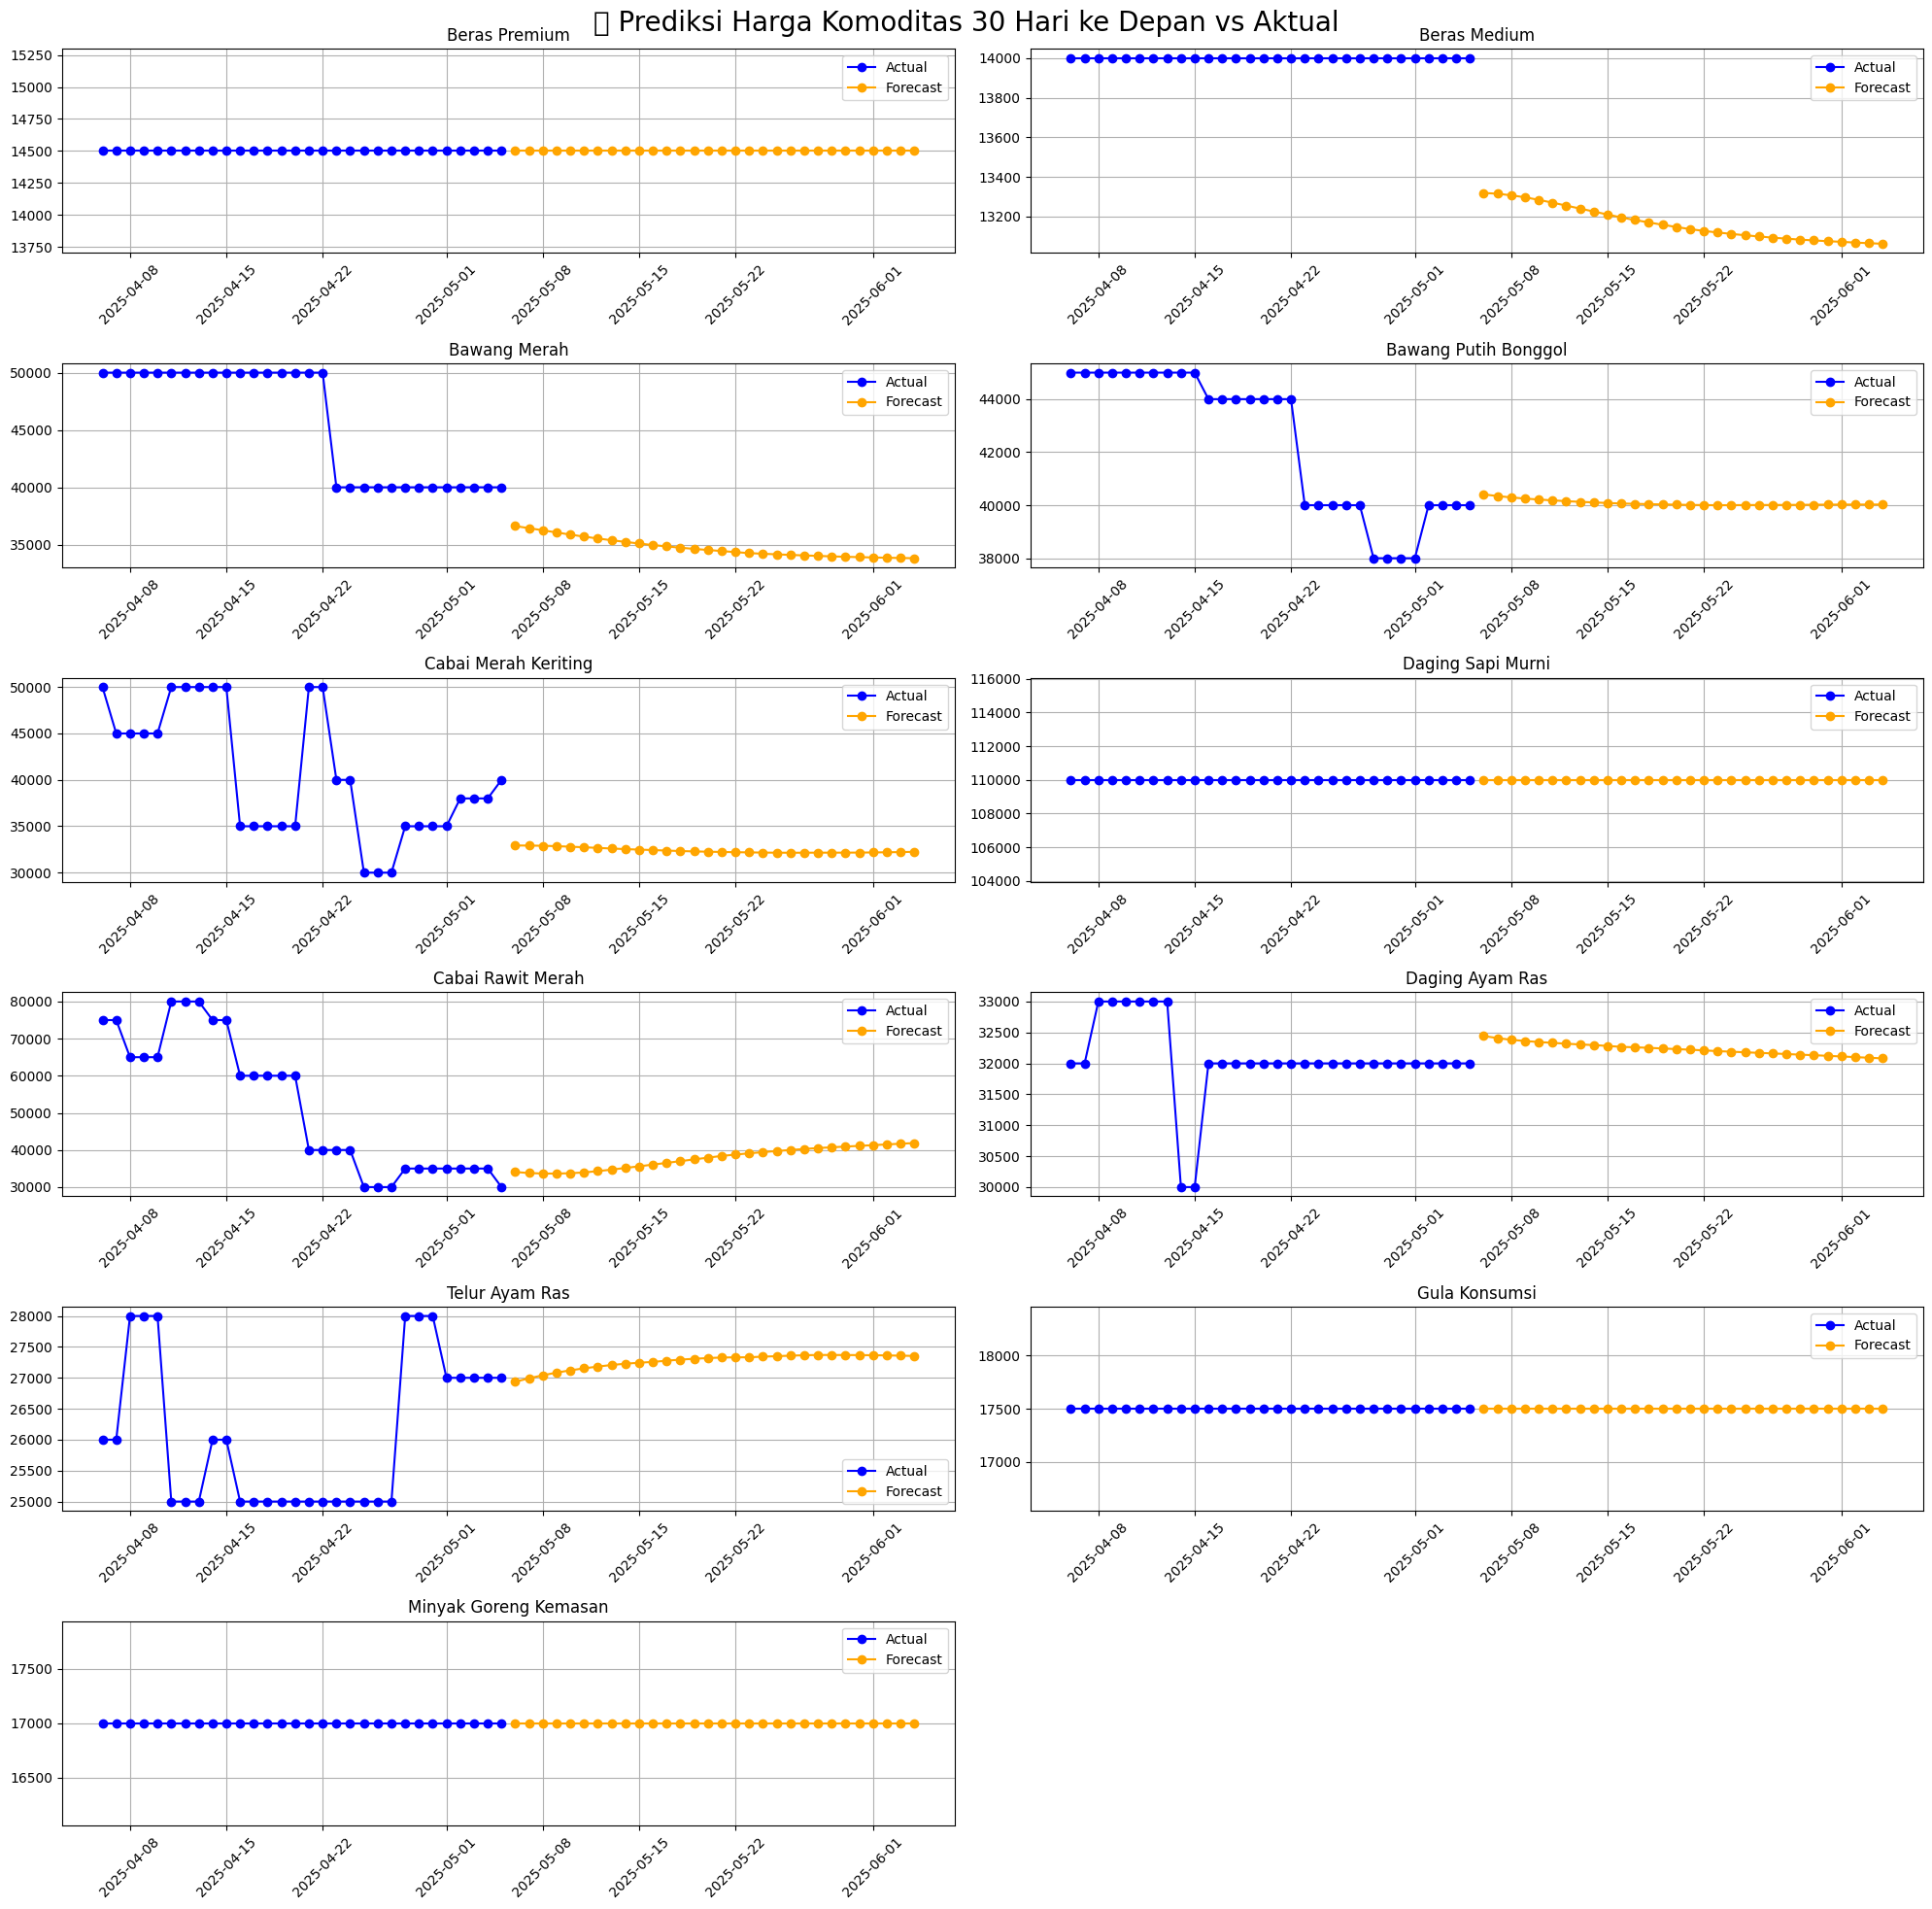

In [30]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

# Membaca data dari file Excel
file_path = "harga_bapokting_pasar_genteng.xlsx"
df = pd.read_excel(file_path, index_col="Tanggal", parse_dates=True)

# Pastikan kolom yang akan digunakan sesuai dengan data yang ada di file
selected_columns = ['Beras Premium', 'Beras Medium', 'Bawang Merah', 'Bawang Putih Bonggol', 
                    'Cabai Merah Keriting', 'Daging Sapi Murni', 'Cabai Rawit Merah', 
                    'Daging Ayam Ras', 'Telur Ayam Ras', 'Gula Konsumsi', 
                    'Minyak Goreng Kemasan']

# Ambil hanya kolom terpilih dan hilangkan NaN
data = df[selected_columns].dropna()

# Normalisasi
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Tentukan sequence length dan ambil sequence terakhir dari data yang ada
sequence_length = 30
last_sequence = scaled_data[-sequence_length:]  # shape (60, n_features)
input_sequence = last_sequence[np.newaxis, :, :]  # shape (1, 60, n_features)

# Muat model LSTM yang sudah dilatih
model = load_model("lstm_bapokting.keras")  # Ganti dengan path model LSTM kamu

# Simpan hasil prediksi tereskalasi
n_future = 30  # Prediksi 30 hari ke depan
predictions_scaled = []

for _ in range(n_future):
    # Prediksi langkah berikutnya
    next_pred_scaled = model.predict(input_sequence, verbose=0)[0]  # shape: (n_features,)
    predictions_scaled.append(next_pred_scaled)

    # Perbarui sequence input: buang pertama, tambah prediksi di akhir
    new_sequence = np.vstack([input_sequence[0, 1:], next_pred_scaled])  # shape: (60, n_features)
    input_sequence = new_sequence[np.newaxis, :, :]  # shape: (1, 60, n_features)

# Invers transform hasil prediksi ke skala asli
predictions_scaled = np.array(predictions_scaled)
predictions = scaler.inverse_transform(predictions_scaled)

# Bulatkan hasil prediksi menjadi bilangan bulat tanpa koma
predictions = np.round(predictions).astype(int)

# Buat DataFrame hasil prediksi dengan index tanggal
last_date = pd.to_datetime(df.index[-1])  # Pastikan tanggal terakhir sudah dalam format datetime
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=n_future)
forecast_df = pd.DataFrame(predictions, columns=selected_columns, index=future_dates)

# Tampilkan hasil prediksi
print("📈 Prediksi Harga 30 Hari ke Depan:")
print(forecast_df)

# Visualisasi
plt.figure(figsize=(20, 20))
for i, col in enumerate(selected_columns):
    plt.subplot(6, 2, i + 1)
    
    # Plot harga aktual (periode terakhir data)
    plt.plot(df.index[-sequence_length:], df[col][-sequence_length:], marker='o', linestyle='-', color='blue', label='Actual')
    
    # Plot harga prediksi
    plt.plot(forecast_df.index, forecast_df[col], marker='o', linestyle='-', color='orange', label='Forecast')
    
    plt.title(f"{col}")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    
plt.suptitle("📊 Prediksi Harga Komoditas 30 Hari ke Depan vs Aktual", fontsize=20)
plt.tight_layout()
plt.show()
